In [1]:
# Importing common data science packages for data manipulation

import pandas as pd
import numpy as np

# Visualisation packages

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Machine Learning and statistical analysis

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

# Enabling the plots to show automatically

%matplotlib inline

# Showing all columns in previews

pd.set_option('display.max_columns', None)

In [2]:
# Reading the BigQuery data into Pandas dataframe

data = pd.read_csv('pub_data.csv')
data.head()

id  alt_score  num_research_orgs  num_patents  num_times_cited  \
0  pub.1141444818          2                 20            0                3   
1  pub.1130311343        296                 11            0              244   
2  pub.1138071034         82                 10            0               17   
3  pub.1143220684          1                 13            0               10   
4  pub.1138502761         41                 13            0               10   

   num_researchers  recent_citations  ML_relevance publication_type  \
0               16                 2           0.0          article   
1               12               105           0.0          article   
2               12                13           0.0          article   
3               12                10           0.0          article   
4               13                 8           0.0          article   

         date  num_clinical_trials  num_associated_grants  years_active  \
0  2021-09-28                    0                    NaN           NaN   
1  2020-08-24                    0                    NaN           NaN   
2  2021-05-19                    0                    NaN           NaN   
3  2021-11-18                    0                    NaN           NaN   
4  2021-06-29                    3                    NaN           NaN   

   total_grant_amount  num_active_patents  num_pending_patents  \
0                 NaN                 NaN                  NaN   
1                 NaN                 NaN                  NaN   
2                 NaN                 NaN                  NaN   
3                 NaN                 NaN                  NaN   
4                 NaN                 NaN                  NaN   

   num_org_countries  num_nonprofit_orgs  num_company_orgs  \
0                2.0                 0.0               0.0   
1                1.0                 0.0               0.0   
2                4.0                 1.0               0.0   
3                9.0                 0.0               0.0   
4               11.0                 0.0               0.0   

   num_education_orgs  num_facility_orgs  num_government_orgs  \
0                 7.0                0.0                  0.0   
1                 4.0                0.0                  0.0   
2                 7.0                1.0                  1.0   
3                13.0                0.0                  0.0   
4                 2.0                0.0                  0.0   

   num_healthcare_orgs  num_archive_orgs  num_other_orgs  \
0                 13.0               0.0             0.0   
1                  7.0               0.0             0.0   
2                  0.0               0.0             0.0   
3                  0.0               0.0             0.0   
4                 11.0               0.0             0.0   

   num_prev_pubs_by_journal  total_journal_altmetric  journal_impact_score  \
0                        16                      254             15.875000   
1                        28                     4907            175.250000   
2                       287                    41240            143.693380   
3                        46                       73              1.586957   
4                        88                     1332             15.136364   

   total_prev_pubs  total_prev_altmetrics  prev_pubs_per_auths  \
0            182.0                 4073.0            11.375000   
1             44.0                 6922.0             3.666667   
2             49.0                 4749.0             4.083333   
3             73.0                 1221.0             6.083333   
4             48.0                11252.0             3.692308   

   prev_altmetrics_per_auths  
0                 254.562500  
1                 576.833333  
2                 395.750000  
3                 101.750000  
4                 865.538462

In [3]:
# Getting an overview of the data

display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756699 entries, 0 to 756698
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         756699 non-null  object 
 1   alt_score                  756699 non-null  int64  
 2   num_research_orgs          756699 non-null  int64  
 3   num_patents                756699 non-null  int64  
 4   num_times_cited            756699 non-null  int64  
 5   num_researchers            756699 non-null  int64  
 6   recent_citations           756699 non-null  int64  
 7   ML_relevance               756699 non-null  float64
 8   publication_type           756699 non-null  object 
 9   date                       756699 non-null  object 
 10  num_clinical_trials        756699 non-null  int64  
 11  num_associated_grants      15716 non-null   float64
 12  years_active               15716 non-null   float64
 13  total_grant_amount         14

None

alt_score  num_research_orgs    num_patents  num_times_cited  \
count  756699.000000      756699.000000  756699.000000    756699.000000   
mean       40.714067           2.462797       0.026519        13.612160   
std       340.763420           3.866562       0.612799       119.161018   
min         0.000000           0.000000       0.000000         0.000000   
25%         1.000000           1.000000       0.000000         0.000000   
50%         3.000000           2.000000       0.000000         2.000000   
75%        11.000000           3.000000       0.000000         8.000000   
max     44954.000000        1126.000000     179.000000     39099.000000   

       num_researchers  recent_citations   ML_relevance  num_clinical_trials  \
count    756699.000000     756699.000000  756699.000000        756699.000000   
mean          5.388503          7.960285       0.019616             0.265292   
std          14.825125         56.666385       0.094782             3.489751   
min           0.000000          0.000000       0.000000             0.000000   
25%           2.000000          0.000000       0.000000             0.000000   
50%           4.000000          2.000000       0.000000             0.000000   
75%           7.000000          6.000000       0.000000             0.000000   
max        5079.000000      33235.000000       0.889000           486.000000   

       num_associated_grants  years_active  total_grant_amount  \
count           15716.000000  15716.000000        1.461800e+04   
mean                1.320183      3.456796        1.552986e+07   
std                 0.837585      1.431069        8.284986e+07   
min                 1.000000      1.000000        6.250000e+02   
25%                 1.000000      2.000000        2.199130e+05   
50%                 1.000000      3.000000        8.566080e+05   
75%                 1.000000      4.000000        3.773778e+06   
max                17.000000      9.000000        1.335257e+09   

       num_active_patents  num_pending_patents  num_org_countries  \
count         6721.000000          6721.000000      639662.000000   
mean             0.454843             1.729058           1.566498   
std              1.483769             3.804634           1.511055   
min              0.000000             0.000000           1.000000   
25%              0.000000             1.000000           1.000000   
50%              0.000000             1.000000           1.000000   
75%              0.000000             2.000000           2.000000   
max             36.000000           107.000000          83.000000   

       num_nonprofit_orgs  num_company_orgs  num_education_orgs  \
count       639662.000000     639662.000000       639662.000000   
mean             0.084556          0.036791            1.890744   
std              0.338486          0.254780            2.578744   
min              0.000000          0.000000            0.000000   
25%              0.000000          0.000000            1.000000   
50%              0.000000          0.000000            1.000000   
75%              0.000000          0.000000            2.000000   
max             30.000000         28.000000          677.000000   

       num_facility_orgs  num_government_orgs  num_healthcare_orgs  \
count      639662.000000        639662.000000        639662.000000   
mean            0.165577             0.101816             0.625921   
std             0.674475             0.418446             1.687055   
min             0.000000             0.000000             0.000000   
25%             0.000000             0.000000             0.000000   
50%             0.000000             0.000000             0.000000   
75%             0.000000             0.000000             1.000000   
max           192.000000            36.000000           206.000000   

       num_archive_orgs  num_other_orgs  num_prev_pubs_by_journal  \
count     639662.000000   639662.000000             756699.000000   
mean           0.003275 

# Data cleaning

In [4]:
# Checking for missing values

data.isna().sum()

id                                0
alt_score                         0
num_research_orgs                 0
num_patents                       0
num_times_cited                   0
num_researchers                   0
recent_citations                  0
ML_relevance                      0
publication_type                  0
date                              0
num_clinical_trials               0
num_associated_grants        740983
years_active                 740983
total_grant_amount           742081
num_active_patents           749978
num_pending_patents          749978
num_org_countries            117037
num_nonprofit_orgs           117037
num_company_orgs             117037
num_education_orgs           117037
num_facility_orgs            117037
num_government_orgs          117037
num_healthcare_orgs          117037
num_archive_orgs             117037
num_other_orgs               117037
num_prev_pubs_by_journal          0
total_journal_altmetric           0
journal_impact_score        

In [5]:
# Finding the proportions of missing values

data.isna().sum()/len(data)*100

id                            0.000000
alt_score                     0.000000
num_research_orgs             0.000000
num_patents                   0.000000
num_times_cited               0.000000
num_researchers               0.000000
recent_citations              0.000000
ML_relevance                  0.000000
publication_type              0.000000
date                          0.000000
num_clinical_trials           0.000000
num_associated_grants        97.923084
years_active                 97.923084
total_grant_amount           98.068188
num_active_patents           99.111800
num_pending_patents          99.111800
num_org_countries            15.466784
num_nonprofit_orgs           15.466784
num_company_orgs             15.466784
num_education_orgs           15.466784
num_facility_orgs            15.466784
num_government_orgs          15.466784
num_healthcare_orgs          15.466784
num_archive_orgs             15.466784
num_other_orgs               15.466784
num_prev_pubs_by_journal 

<AxesSubplot:>

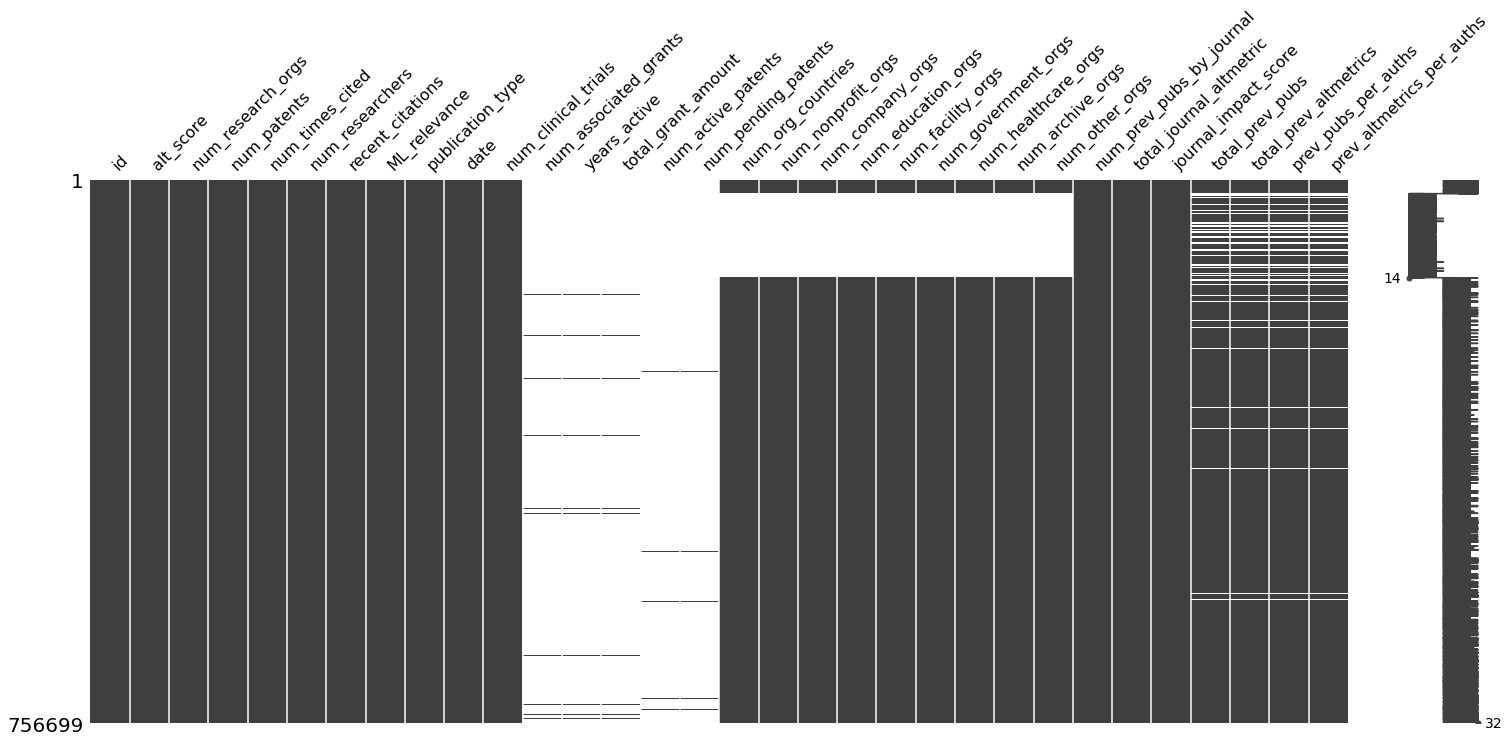

In [6]:
# Visualising missing values

msno.matrix(data)

In [7]:
# Looking into the data that contain null values

data[data['num_associated_grants'].isnull()].describe()

alt_score  num_research_orgs    num_patents  num_times_cited  \
count  740983.000000      740983.000000  740983.000000    740983.000000   
mean       37.819529           2.410888       0.024594        13.134285   
std       321.715425           3.710177       0.599316       117.388517   
min         0.000000           0.000000       0.000000         0.000000   
25%         1.000000           1.000000       0.000000         0.000000   
50%         3.000000           2.000000       0.000000         2.000000   
75%        11.000000           3.000000       0.000000         8.000000   
max     44954.000000        1126.000000     179.000000     39099.000000   

       num_researchers  recent_citations   ML_relevance  num_clinical_trials  \
count    740983.000000     740983.000000  740983.000000        740983.000000   
mean          5.193377          7.684145       0.019628             0.261700   
std          13.491580         56.147836       0.094997             3.444488   
min           0.000000          0.000000       0.000000             0.000000   
25%           2.000000          0.000000       0.000000             0.000000   
50%           4.000000          2.000000       0.000000             0.000000   
75%           7.000000          6.000000       0.000000             0.000000   
max        5079.000000      33235.000000       0.889000           486.000000   

       num_associated_grants  years_active  total_grant_amount  \
count                    0.0           0.0                 0.0   
mean                     NaN           NaN                 NaN   
std                      NaN           NaN                 NaN   
min                      NaN           NaN                 NaN   
25%                      NaN           NaN                 NaN   
50%                      NaN           NaN                 NaN   
75%                      NaN           NaN                 NaN   
max                      NaN           NaN                 NaN   

       num_active_patents  num_pending_patents  num_org_countries  \
count         6182.000000          6182.000000      624297.000000   
mean             0.428502             1.691524           1.558592   
std              1.436230             3.857449           1.486123   
min              0.000000             0.000000           1.000000   
25%              0.000000             1.000000           1.000000   
50%              0.000000             1.000000           1.000000   
75%              0.000000             2.000000           2.000000   
max             36.000000           107.000000          83.000000   

       num_nonprofit_orgs  num_company_orgs  num_education_orgs  \
count       624297.000000     624297.000000        624297.00000   
mean             0.081593          0.035478             1.86516   
std              0.330306          0.251134             2.48557   
min              0.000000          0.000000             0.00000   
25%              0.000000          0.000000             1.00000   
50%              0.000000          0.000000             1.00000   
75%              0.000000          0.000000             2.00000   
max             30.000000         28.000000           677.00000   

       num_facility_orgs  num_government_orgs  num_healthcare_orgs  \
count      624297.000000        624297.000000        624297.000000   
mean            0.158508             0.097590             0.615241   
std             0.661444             0.409255             1.589001   
min             0.000000             0.000000             0.000000   
25%             0.000000             0.000000             0.000000   
50%             0.000000             0.000000             0.000000   
75%             0.000000             0.000000             1.000000   
max           192.000000            36.000000           181.000000   

       num_archive_orgs  num_other_orgs  num_prev_pubs_by_journal  \
count     624297.000000   624297.000000             740983.000000   
mean           0.003220 

In [8]:
# Creating binary variable due to majority data missing.

data['grant_data_available'] = data['num_associated_grants'].notna().astype(int)
data['patent_data_available'] = data['num_active_patents'].notna().astype(int)


display(data['grant_data_available'].value_counts())
display(data['patent_data_available'].value_counts())

0    740983
1     15716
Name: grant_data_available, dtype: int64

0    749978
1      6721
Name: patent_data_available, dtype: int64

In [9]:
# Checking the values of num_org_countries. No publications with 0 orgs, is this represented by missing value?

display(data['num_org_countries'].value_counts())

data[data['num_org_countries'] == 0]

1.0     452045
2.0     116795
3.0      37126
4.0      14870
5.0       6834
         ...  
79.0         1
54.0         1
53.0         1
64.0         1
68.0         1
Name: num_org_countries, Length: 64, dtype: int64

Empty DataFrame
Columns: [id, alt_score, num_research_orgs, num_patents, num_times_cited, num_researchers, recent_citations, ML_relevance, publication_type, date, num_clinical_trials, num_associated_grants, years_active, total_grant_amount, num_active_patents, num_pending_patents, num_org_countries, num_nonprofit_orgs, num_company_orgs, num_education_orgs, num_facility_orgs, num_government_orgs, num_healthcare_orgs, num_archive_orgs, num_other_orgs, num_prev_pubs_by_journal, total_journal_altmetric, journal_impact_score, total_prev_pubs, total_prev_altmetrics, prev_pubs_per_auths, prev_altmetrics_per_auths, grant_data_available, patent_data_available]
Index: []

<AxesSubplot:>

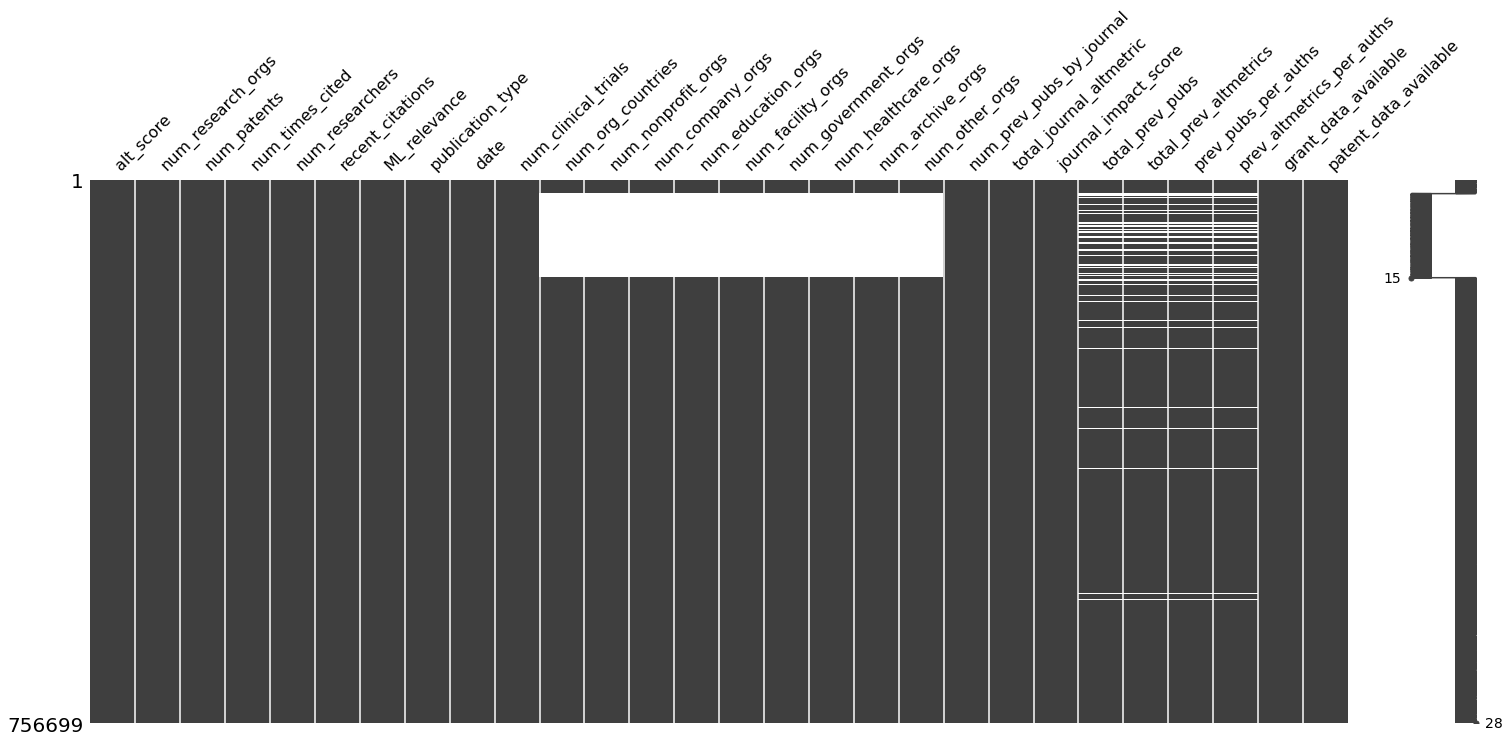

In [10]:
# Dropping columns with large portions of missing values (and redundant columns)

cols_to_drop = ['id', 'num_associated_grants', 'years_active', 'total_grant_amount', 'num_active_patents', 'num_pending_patents']

data_drop = data.drop(columns=cols_to_drop, axis=1)
msno.matrix(data_drop)

In [11]:
# Checking proportion of missing data in remaining columns

data_drop.isna().sum()/len(data_drop)*100

alt_score                     0.000000
num_research_orgs             0.000000
num_patents                   0.000000
num_times_cited               0.000000
num_researchers               0.000000
recent_citations              0.000000
ML_relevance                  0.000000
publication_type              0.000000
date                          0.000000
num_clinical_trials           0.000000
num_org_countries            15.466784
num_nonprofit_orgs           15.466784
num_company_orgs             15.466784
num_education_orgs           15.466784
num_facility_orgs            15.466784
num_government_orgs          15.466784
num_healthcare_orgs          15.466784
num_archive_orgs             15.466784
num_other_orgs               15.466784
num_prev_pubs_by_journal      0.000000
total_journal_altmetric       0.000000
journal_impact_score          0.000000
total_prev_pubs               8.669894
total_prev_altmetrics         8.669894
prev_pubs_per_auths           8.669894
prev_altmetrics_per_auths

<AxesSubplot:>

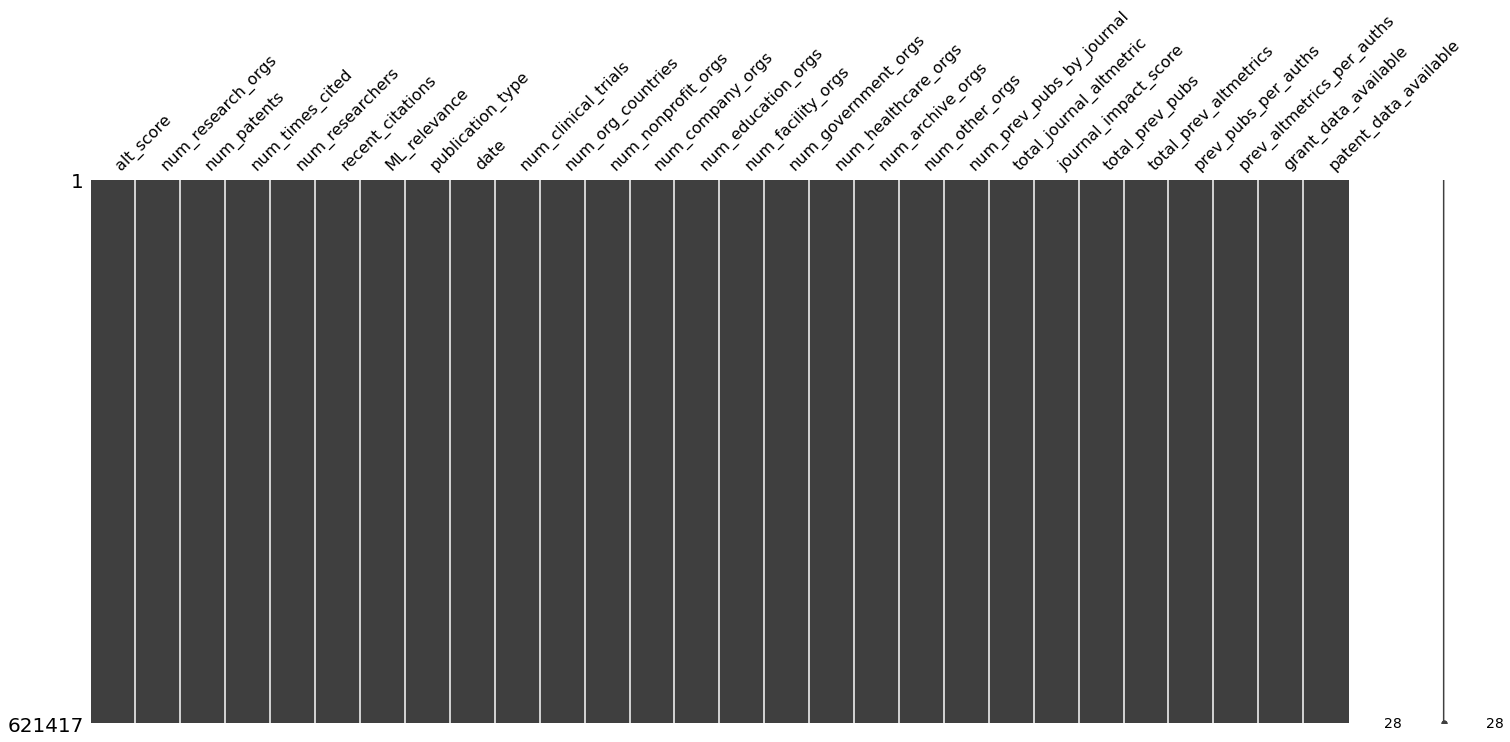

In [12]:
# Dropping data of rows with missing values.
# Null values for organisations can't be confirmed to represent 0 associated organisations (may just be missing)
# Null values regarding journals are only small proportion and so can be dropped.

data_trim = data_drop.dropna()
msno.matrix(data_trim)

In [13]:
# Creating dummy variables for the publication type column

dummies = pd.get_dummies(data_trim['publication_type'], drop_first=True, prefix='is')

data_full = pd.concat([data_trim.drop(columns='publication_type'), dummies], axis=1)
data_full.head()

alt_score  num_research_orgs  num_patents  num_times_cited  \
0          2                 20            0                3   
1        296                 11            0              244   
2         82                 10            0               17   
3          1                 13            0               10   
4         41                 13            0               10   

   num_researchers  recent_citations  ML_relevance        date  \
0               16                 2           0.0  2021-09-28   
1               12               105           0.0  2020-08-24   
2               12                13           0.0  2021-05-19   
3               12                10           0.0  2021-11-18   
4               13                 8           0.0  2021-06-29   

   num_clinical_trials  num_org_countries  num_nonprofit_orgs  \
0                    0                2.0                 0.0   
1                    0                1.0                 0.0   
2                    0                4.0                 1.0   
3                    0                9.0                 0.0   
4                    3               11.0                 0.0   

   num_company_orgs  num_education_orgs  num_facility_orgs  \
0               0.0                 7.0                0.0   
1               0.0                 4.0                0.0   
2               0.0                 7.0                1.0   
3               0.0                13.0                0.0   
4               0.0                 2.0                0.0   

   num_government_orgs  num_healthcare_orgs  num_archive_orgs  num_other_orgs  \
0                  0.0                 13.0               0.0             0.0   
1                  0.0                  7.0               0.0             0.0   
2                  1.0                  0.0               0.0             0.0   
3                  0.0                  0.0               0.0             0.0   
4                  0.0                 11.0               0.0             0.0   

   num_prev_pubs_by_journal  total_journal_altmetric  journal_impact_score  \
0                        16                      254             15.875000   
1                        28                     4907            175.250000   
2                       287                    41240            143.693380   
3                        46                       73              1.586957   
4                        88                     1332             15.136364   

   total_prev_pubs  total_prev_altmetrics  prev_pubs_per_auths  \
0            182.0                 4073.0            11.375000   
1             44.0                 6922.0             3.666667   
2             49.0                 4749.0             4.083333   
3             73.0                 1221.0             6.083333   
4             48.0                11252.0             3.692308   

   prev_altmetrics_per_auths  grant_data_available  patent_data_available  \
0                 254.562500                     0                      0   
1                 576.833333                     0                      0   
2                 395.750000                     0                      0   
3                 101.750000                     0                      0   
4                 865.538462                     0                      0   

   is_chapter  is_monograph  is_preprint  is_proceeding  
0           0             0            0              0  
1           0             0            0              0  
2           0             0            0              0  
3           0             0            0              0  
4           0             0            0              0

In [14]:
# Converting the date column to datetime.

data_full['date_column'] = pd.to_datetime(data_full['date'], format='%Y-%m', errors='coerce')

# Calculating the number of months since the earliest date in the dataset, and dropping the previous columns.

earliest = data_full['date_column'].min()
data_full['recorded_month'] = (data_full['date_column'] - earliest)/np.timedelta64(1, 'M')
data_full['recorded_month'] = data_full['recorded_month'].astype('int64')
data_full = data_full.drop(columns=['date', 'date_column'], axis=1)
data_full.head()

alt_score  num_research_orgs  num_patents  num_times_cited  \
0          2                 20            0                3   
1        296                 11            0              244   
2         82                 10            0               17   
3          1                 13            0               10   
4         41                 13            0               10   

   num_researchers  recent_citations  ML_relevance  num_clinical_trials  \
0               16                 2           0.0                    0   
1               12               105           0.0                    0   
2               12                13           0.0                    0   
3               12                10           0.0                    0   
4               13                 8           0.0                    3   

   num_org_countries  num_nonprofit_orgs  num_company_orgs  \
0                2.0                 0.0               0.0   
1                1.0                 0.0               0.0   
2                4.0                 1.0               0.0   
3                9.0                 0.0               0.0   
4               11.0                 0.0               0.0   

   num_education_orgs  num_facility_orgs  num_government_orgs  \
0                 7.0                0.0                  0.0   
1                 4.0                0.0                  0.0   
2                 7.0                1.0                  1.0   
3                13.0                0.0                  0.0   
4                 2.0                0.0                  0.0   

   num_healthcare_orgs  num_archive_orgs  num_other_orgs  \
0                 13.0               0.0             0.0   
1                  7.0               0.0             0.0   
2                  0.0               0.0             0.0   
3                  0.0               0.0             0.0   
4                 11.0               0.0             0.0   

   num_prev_pubs_by_journal  total_journal_altmetric  journal_impact_score  \
0                        16                      254             15.875000   
1                        28                     4907            175.250000   
2                       287                    41240            143.693380   
3                        46                       73              1.586957   
4                        88                     1332             15.136364   

   total_prev_pubs  total_prev_altmetrics  prev_pubs_per_auths  \
0            182.0                 4073.0            11.375000   
1             44.0                 6922.0             3.666667   
2             49.0                 4749.0             4.083333   
3             73.0                 1221.0             6.083333   
4             48.0                11252.0             3.692308   

   prev_altmetrics_per_auths  grant_data_available  patent_data_available  \
0                 254.562500                     0                      0   
1                 576.833333                     0                      0   
2                 395.750000                     0                      0   
3                 101.750000                     0                      0   
4                 865.538462                     0                      0   

   is_chapter  is_monograph  is_preprint  is_proceeding  recorded_month  
0           0             0            0              0              20  
1           0             0            0              0               7  
2           0             0            0              0              16  
3           0             0            0              0              22  
4           0             0            0              0              17

In [15]:
# Final review of the dataset before EDA.

data_full.describe()

alt_score  num_research_orgs    num_patents  num_times_cited  \
count  621417.000000      621417.000000  621417.000000    621417.000000   
mean       41.411975           2.953728       0.029547        15.343452   
std       341.924954           4.089273       0.652666       123.472316   
min         0.000000           1.000000       0.000000         0.000000   
25%         1.000000           1.000000       0.000000         0.000000   
50%         4.000000           2.000000       0.000000         3.000000   
75%        12.000000           3.000000       0.000000        10.000000   
max     34903.000000        1126.000000     179.000000     39099.000000   

       num_researchers  recent_citations   ML_relevance  num_clinical_trials  \
count    621417.000000     621417.000000  621417.000000        621417.000000   
mean          6.080370          9.004754       0.018192             0.291104   
std           9.875481         60.664712       0.088759             3.594701   
min           1.000000          0.000000       0.000000             0.000000   
25%           2.000000          0.000000       0.000000             0.000000   
50%           4.000000          2.000000       0.000000             0.000000   
75%           7.000000          7.000000       0.000000             0.000000   
max        2240.000000      33235.000000       0.889000           486.000000   

       num_org_countries  num_nonprofit_orgs  num_company_orgs  \
count      621417.000000       621417.000000     621417.000000   
mean            1.578249            0.086095          0.037382   
std             1.526605            0.341740          0.257018   
min             1.000000            0.000000          0.000000   
25%             1.000000            0.000000          0.000000   
50%             1.000000            0.000000          0.000000   
75%             2.000000            0.000000          0.000000   
max            83.000000           30.000000         28.000000   

       num_education_orgs  num_facility_orgs  num_government_orgs  \
count       621417.000000      621417.000000        621417.000000   
mean             1.912321           0.169215             0.103568   
std              2.605720           0.682387             0.422574   
min              0.000000           0.000000             0.000000   
25%              1.000000           0.000000             0.000000   
50%              1.000000           0.000000             0.000000   
75%              2.000000           0.000000             0.000000   
max            677.000000         192.000000            36.000000   

       num_healthcare_orgs  num_archive_orgs  num_other_orgs  \
count        621417.000000     621417.000000   621417.000000   
mean              0.637125          0.003280        0.004742   
std               1.705772          0.065859        0.070505   
min               0.000000          0.000000        0.000000   
25%               0.000000          0.000000        0.000000   
50%               0.000000          0.000000        0.000000   
75%               1.000000          0.000000        0.000000   
max             206.000000          7.000000        6.000000   

       num_prev_pubs_by_journal  total_journal_altmetric  \
count             621417.000000             6.214170e+05   
mean                3741.334043             8.200704e+04   
std                20816.902933             2.783221e+05   
min                    1.000000             1.000000e+00   
25%                   28.000000             2.400000e+02   
50%                  108.000000             1.642000e+03   
75%                  580.000000             1.825900e+04   
max               285962.000000             2.249776e+06   

       journal_impact_score  total_prev_pubs  total_prev_altmetrics  \
count         621417.000000    621417.000000           6.214170e+05   
mean              43.211125        32.711067           5.857427e+03   
std              108.985166        90.641677           4.443574e+0

In [16]:
# Renaming dataframe for ease.

df = data_full

# Exploratory Data Analysis

In [17]:
# Function to show distribution of each variable (code for creating grid taken from chat-GPT)

def into_grid(df):
    num_cols = len(df.columns)
    num_rows = (num_cols - 1) // 2 + 1
    
    # Creating subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 36))
    
    # Iterating through columns of dataframe, selecting appropriate subplot and creating histogram
    for i, column in enumerate(df.columns):
        ax = axes[i // 2, i % 2]
        df[column].hist(ax=ax)
        ax.set_title(f'Distribution of {column} variable.')

    # If the number of columns is odd, removes the empty subplot
    if num_cols % 2 != 0:
        fig.delaxes(axes.flatten()[-1])
    
    plt.tight_layout()
    plt.show()

#into_grid(df)

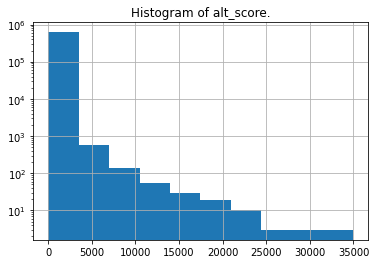

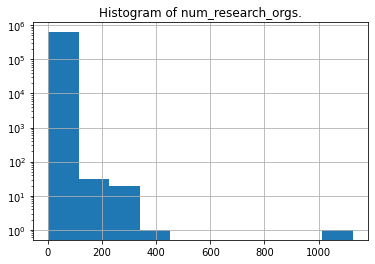

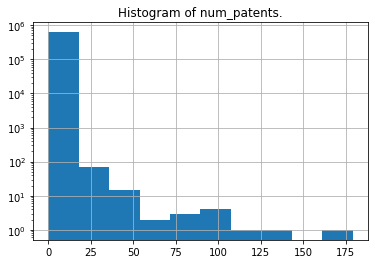

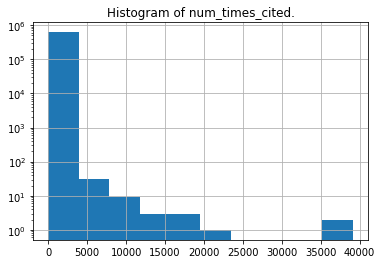

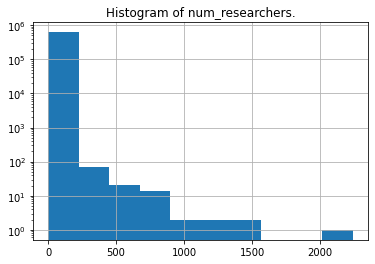

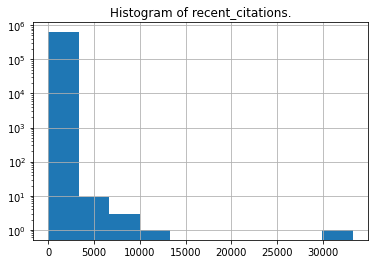

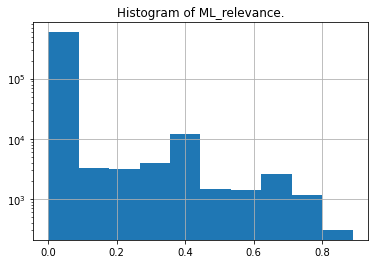

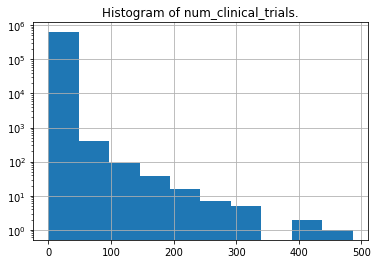

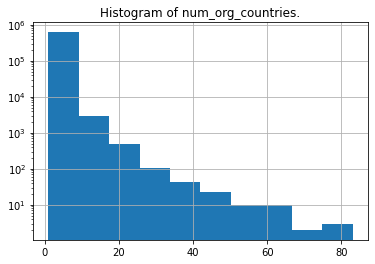

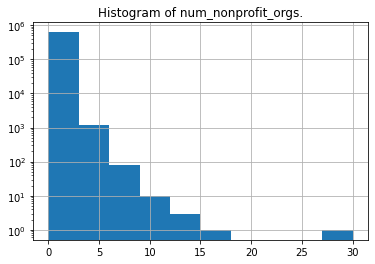

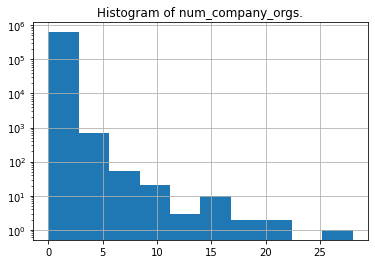

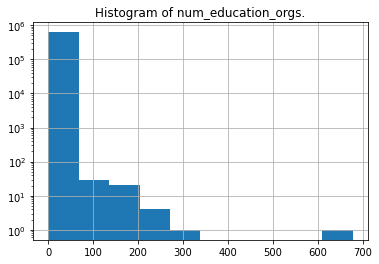

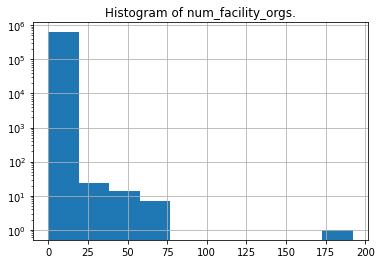

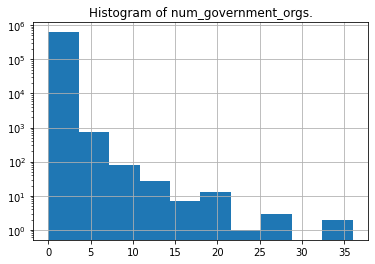

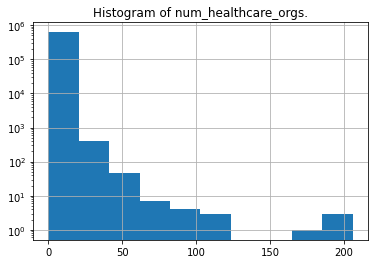

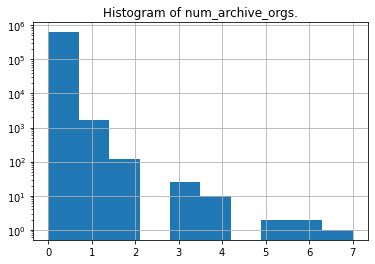

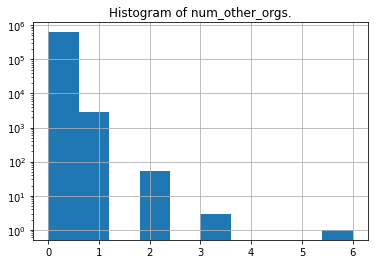

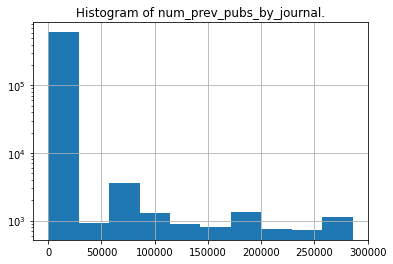

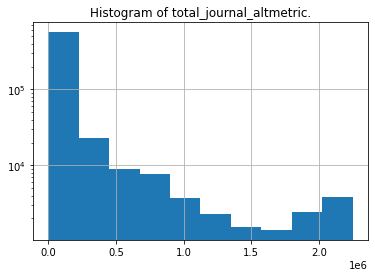

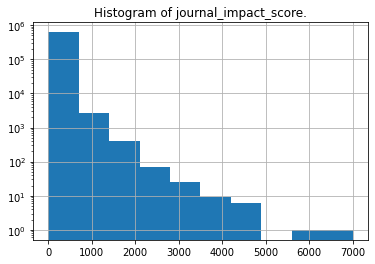

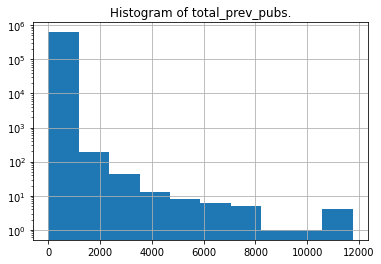

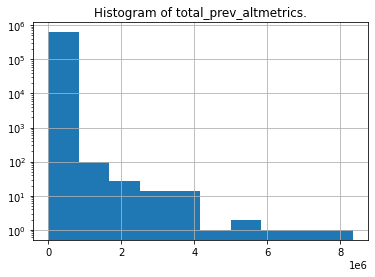

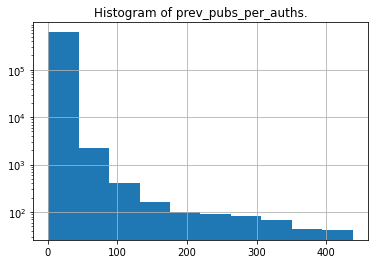

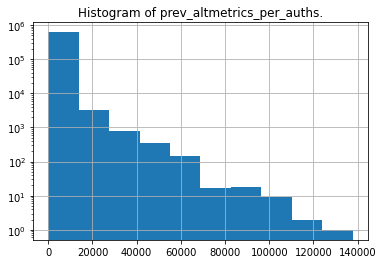

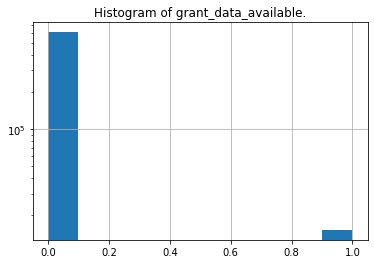

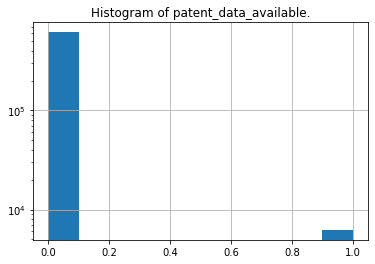

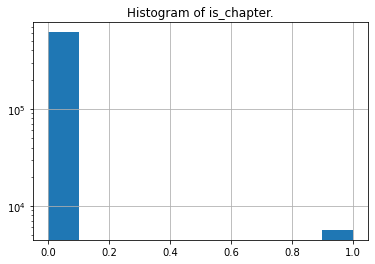

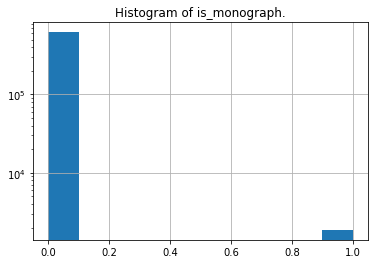

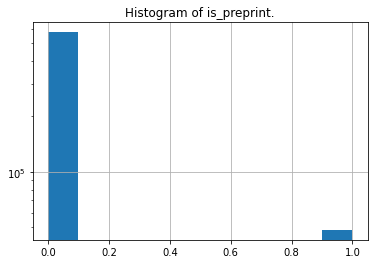

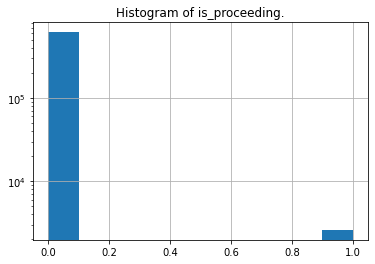

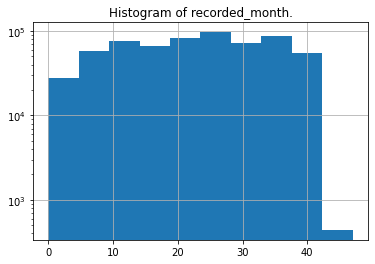

In [18]:
# As distributions are all highly skewed to the right, checking the log of each distribution.

for col in df:
    df[col].hist()
    plt.yscale('log')
    plt.title(f'Histogram of {col}.')
    plt.show()

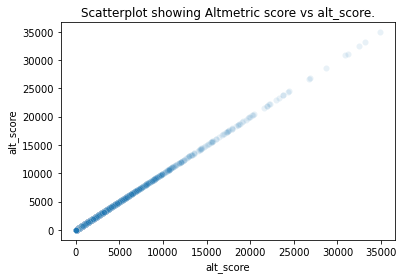

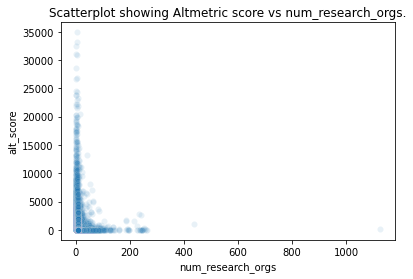

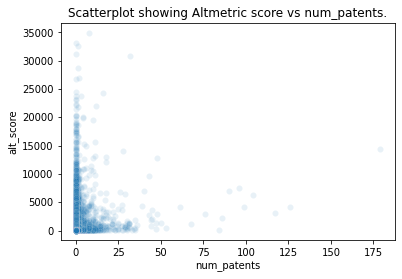

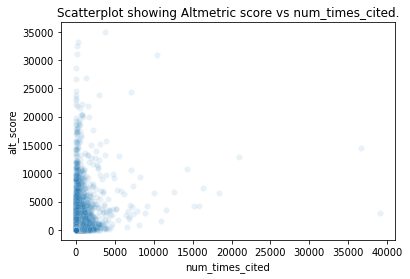

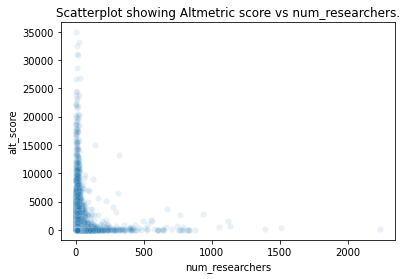

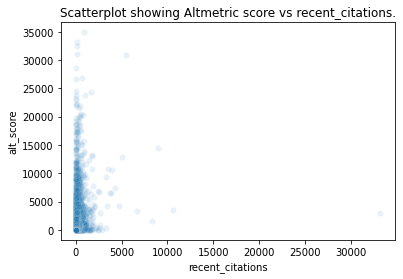

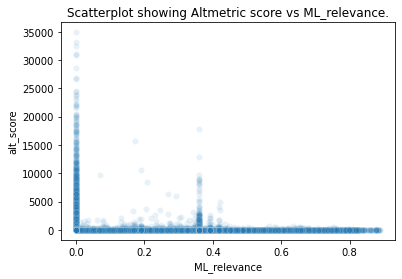

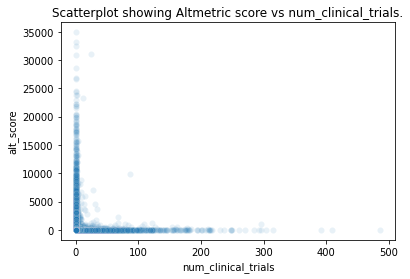

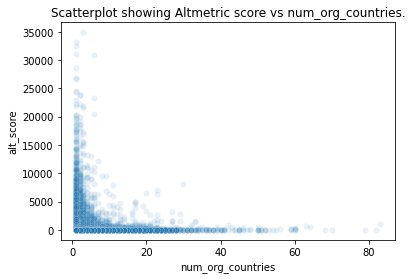

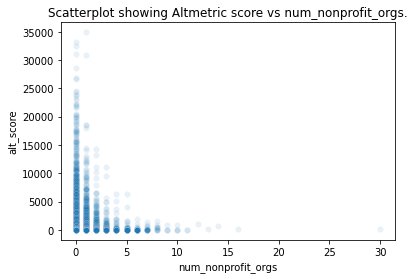

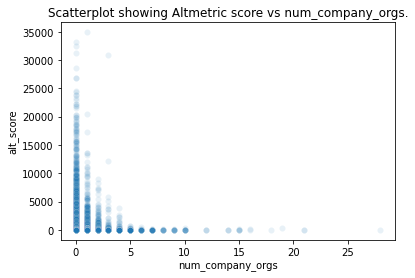

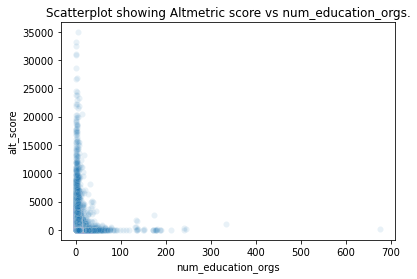

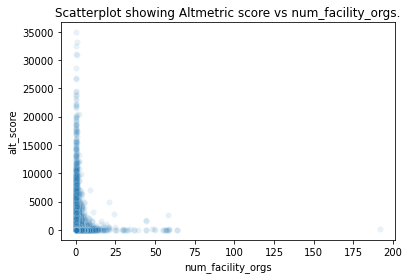

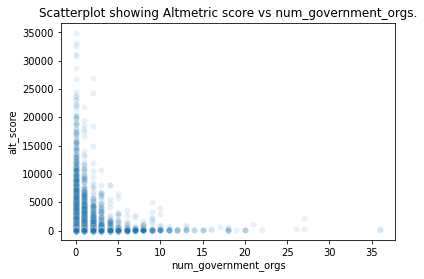

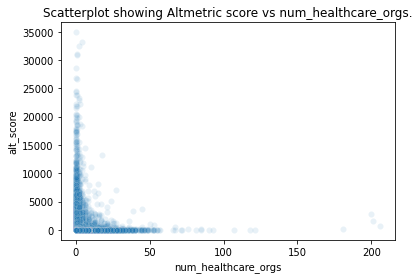

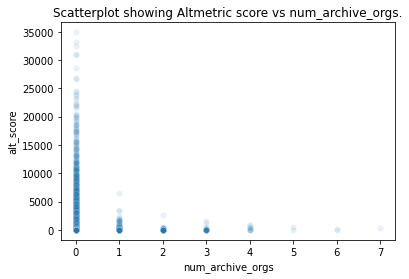

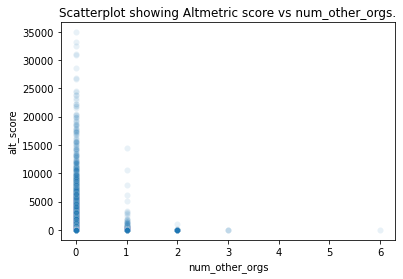

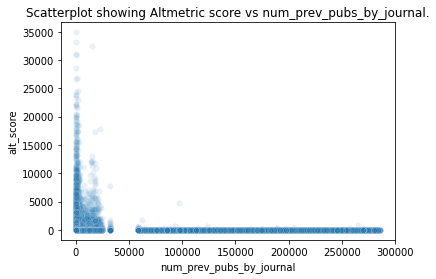

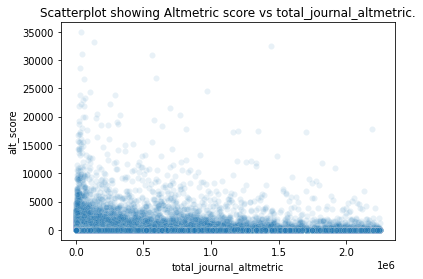

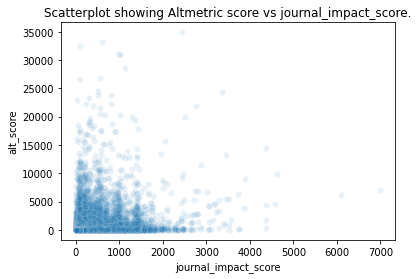

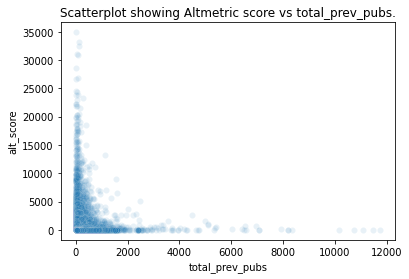

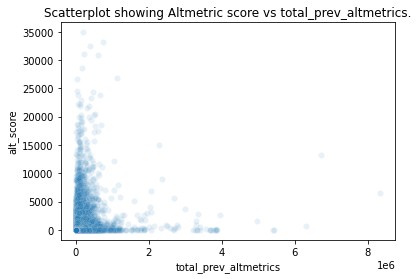

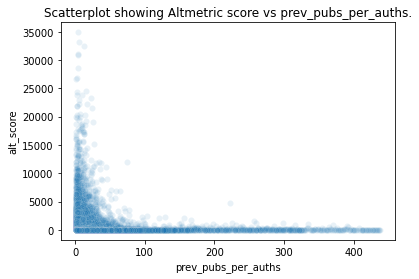

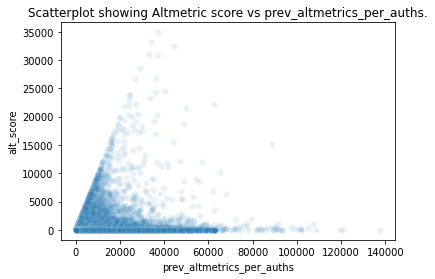

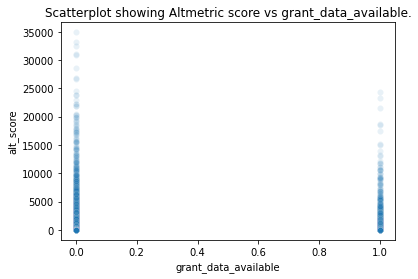

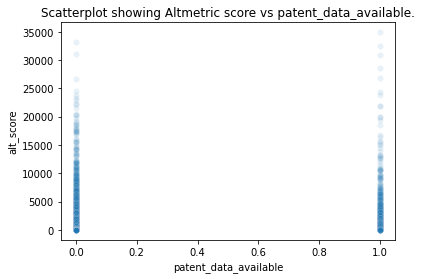

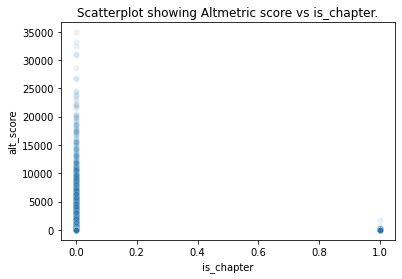

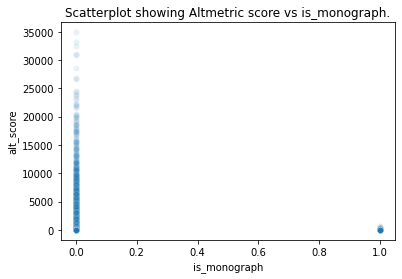

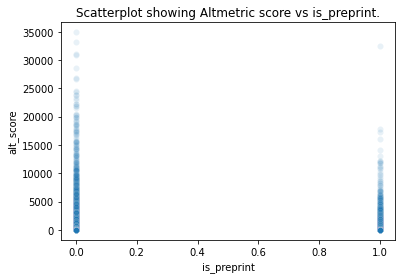

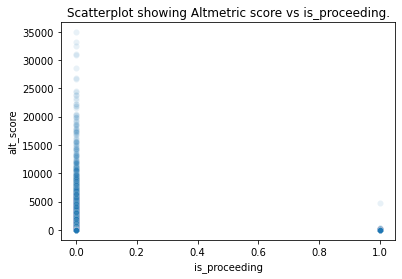

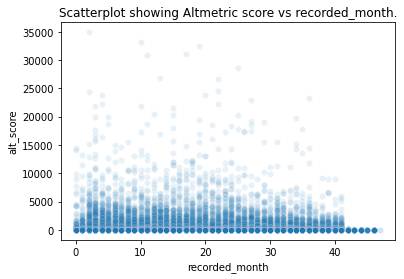

In [19]:
# Checking each variable against the target variable. Looking for relationships/outliers.

for col in df:
    sns.scatterplot(data=df, x=col, y='alt_score', alpha=0.1)
    plt.title(f'Scatterplot showing Altmetric score vs {col}.')
    plt.show()


In [20]:
# Creating an alternative log-transformed dataframe and comparing the relationships between the log of the target and predictors.

log_df = pd.DataFrame()

for col in df:
    log_df[f'log_{col}'] = np.log(df[col] + 1e-10)

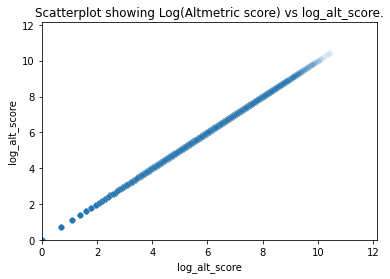

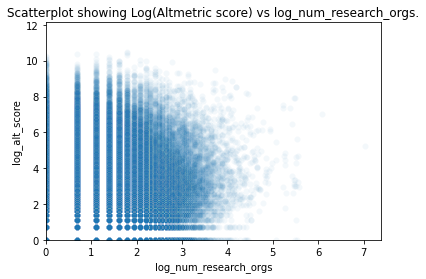

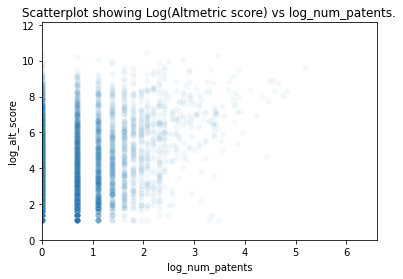

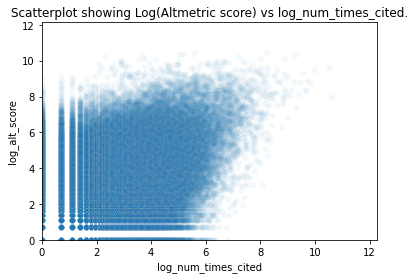

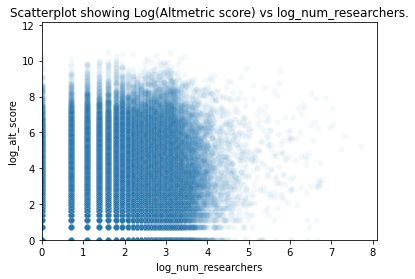

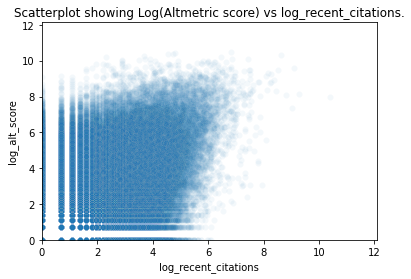

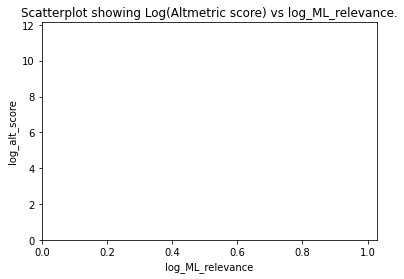

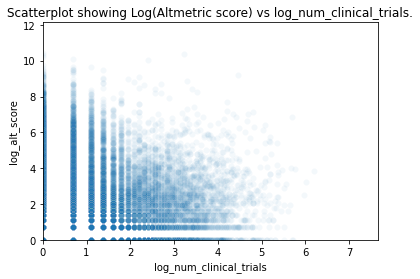

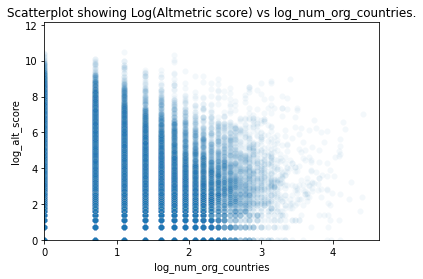

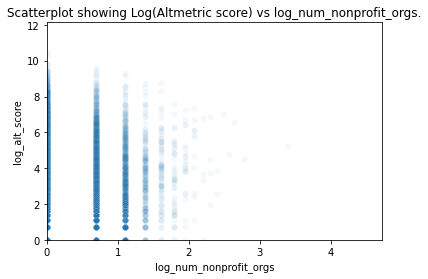

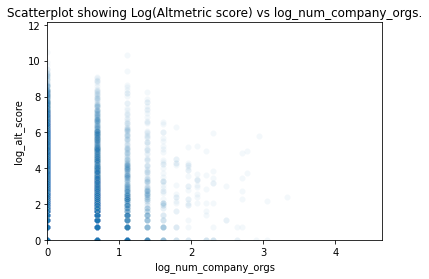

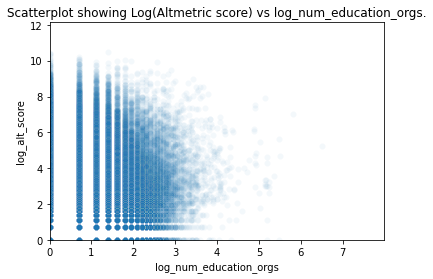

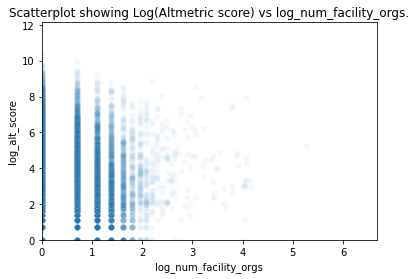

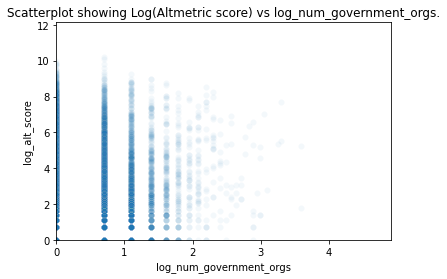

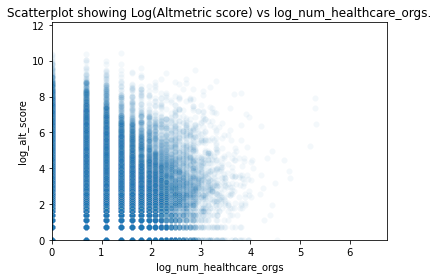

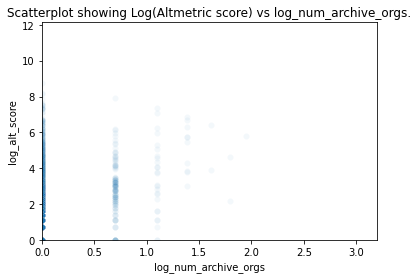

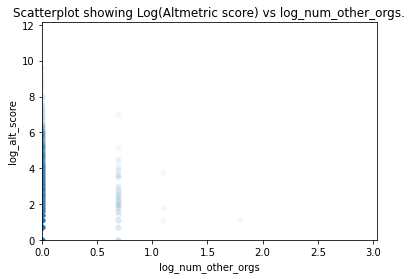

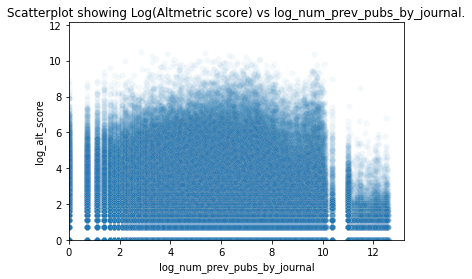

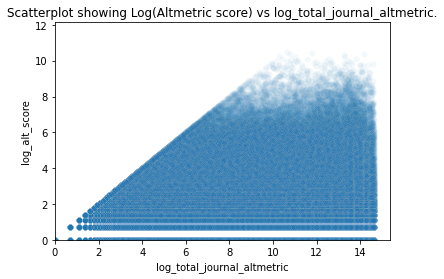

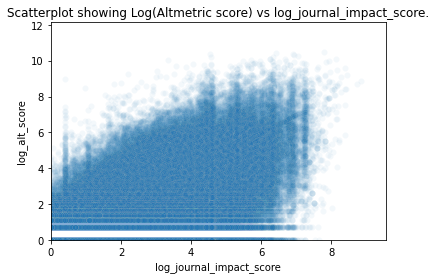

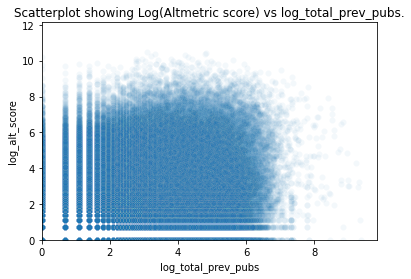

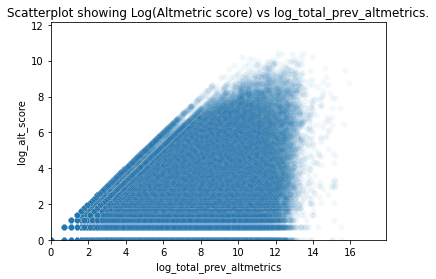

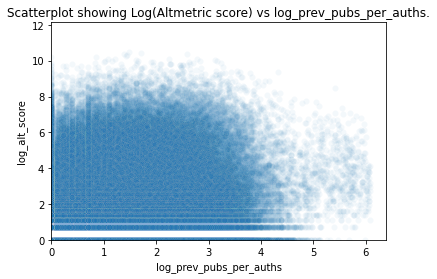

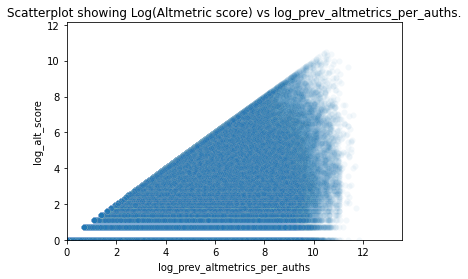

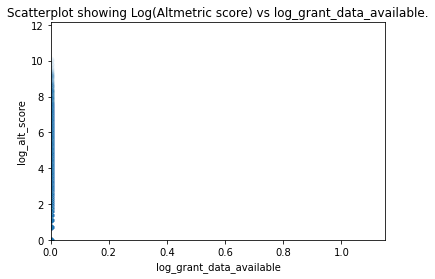

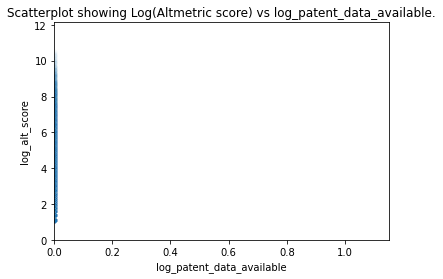

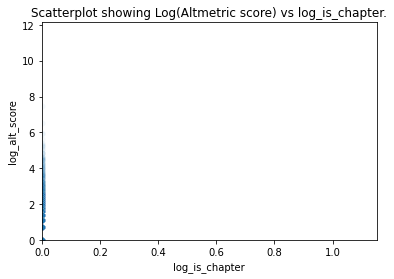

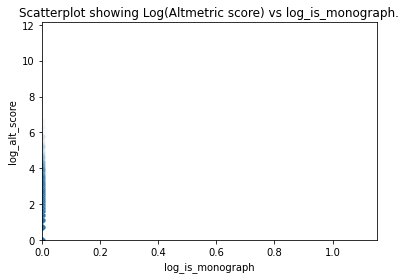

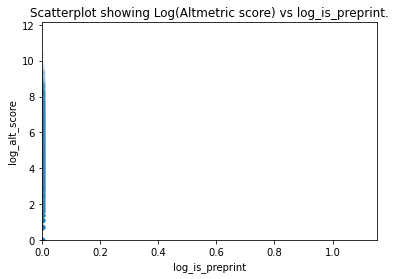

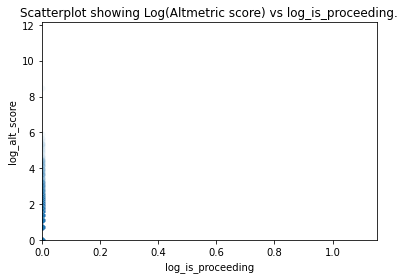

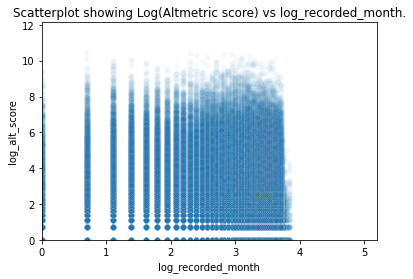

In [21]:
# Visualising the relationships between the log of the variables.
# Axis limit set at 0 due to effect of epsilon in previous code block (1e-10)

for col in log_df:
    sns.scatterplot(data=log_df, x=col, y='log_alt_score', alpha=0.05)
    plt.title(f'Scatterplot showing Log(Altmetric score) vs {col}.')
    plt.ylim(0)
    plt.xlim(0)
    plt.show()

In [22]:
# Choosing specific variables to apply the log transformation, including the target variable 'alt_score'.

cols_to_log = ['num_research_orgs',
               'num_patents',
               'num_times_cited',
               'num_researchers',
               'recent_citations',
              'num_clinical_trials',
              'num_org_countries',
              'num_prev_pubs_by_journal',
              'total_journal_altmetric',
              'journal_impact_score',
              'total_prev_pubs',
              'total_prev_altmetrics',
              'prev_pubs_per_auths',
              'prev_altmetrics_per_auths',
              'alt_score']

# Iterating through the list, creating the new columns
# Epsilon (1e-10) added to mitigate against the dividing by zero error.

for col in cols_to_log:
    df[f'log_{col}'] = np.log(df[col] + 1e-10)
    df = df.drop(columns=col, axis=1)


In [23]:
# Confirming no issues in the new columns

df.describe()

ML_relevance  num_nonprofit_orgs  num_company_orgs  \
count  621417.000000       621417.000000     621417.000000   
mean        0.018192            0.086095          0.037382   
std         0.088759            0.341740          0.257018   
min         0.000000            0.000000          0.000000   
25%         0.000000            0.000000          0.000000   
50%         0.000000            0.000000          0.000000   
75%         0.000000            0.000000          0.000000   
max         0.889000           30.000000         28.000000   

       num_education_orgs  num_facility_orgs  num_government_orgs  \
count       621417.000000      621417.000000        621417.000000   
mean             1.912321           0.169215             0.103568   
std              2.605720           0.682387             0.422574   
min              0.000000           0.000000             0.000000   
25%              1.000000           0.000000             0.000000   
50%              1.000000           0.000000             0.000000   
75%              2.000000           0.000000             0.000000   
max            677.000000         192.000000            36.000000   

       num_healthcare_orgs  num_archive_orgs  num_other_orgs  \
count        621417.000000     621417.000000   621417.000000   
mean              0.637125          0.003280        0.004742   
std               1.705772          0.065859        0.070505   
min               0.000000          0.000000        0.000000   
25%               0.000000          0.000000        0.000000   
50%               0.000000          0.000000        0.000000   
75%               1.000000          0.000000        0.000000   
max             206.000000          7.000000        6.000000   

       grant_data_available  patent_data_available     is_chapter  \
count         621417.000000          621417.000000  621417.000000   
mean               0.024600               0.010014       0.009115   
std                0.154904               0.099569       0.095035   
min                0.000000               0.000000       0.000000   
25%                0.000000               0.000000       0.000000   
50%                0.000000               0.000000       0.000000   
75%                0.000000               0.000000       0.000000   
max                1.000000               1.000000       1.000000   

        is_monograph    is_preprint  is_proceeding  recorded_month  \
count  621417.000000  621417.000000  621417.000000   621417.000000   
mean        0.003008       0.077891       0.004174       22.809358   
std         0.054759       0.268001       0.064474       10.747999   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.000000       14.000000   
50%         0.000000       0.000000       0.000000       24.000000   
75%         0.000000       0.000000       0.000000       32.000000   
max         1.000000       1.000000       1.000000       47.000000   

       log_num_research_orgs  log_num_patents  log_num_times_cited  \
count           6.214170e+05    621417.000000        621417.000000   
mean            7.778602e-01       -22.740294            -4.795572   
std             7.115864e-01         2.574716            11.022083   
min             1.000000e-10       -23.025851           -23.025851   
25%             1.000000e-10       -23.025851           -23.025851   
50%             6.931472e-01       -23.025851             1.098612   
75%             1.098612e+00       -23.025851             2.302585   
max             7.026427e+00         5.187386            10.573852   

       log_num_researchers  log_recent_citations  log_num_clinical_trials  \
count         6.214170e+05         621417.000000            621417.000000   
mean          1.449603e+00             -5.505678               -21.496124   
std           8.263964e-01             11.193365                 5.820932   
min           1.000000e-10            -23.025851          

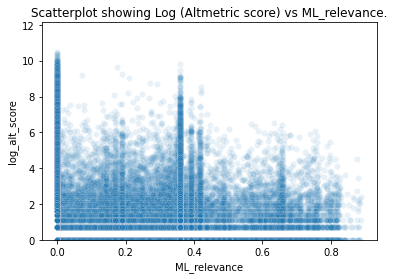

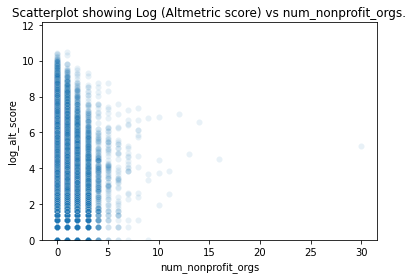

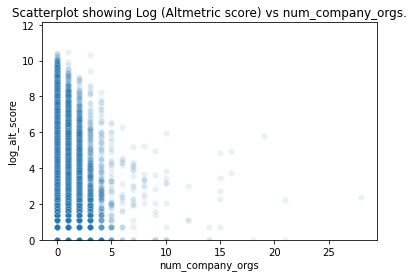

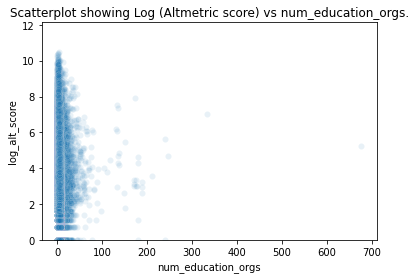

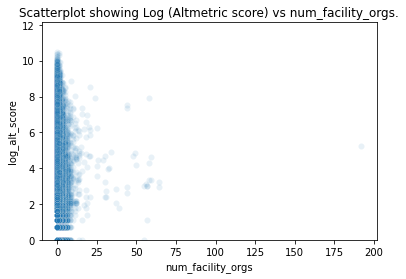

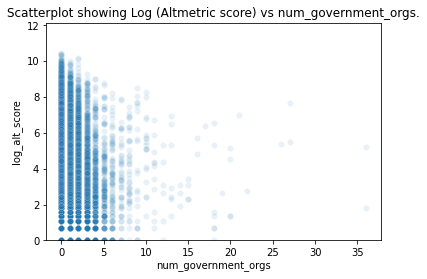

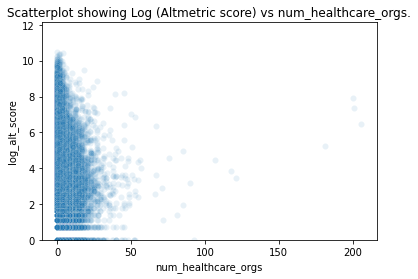

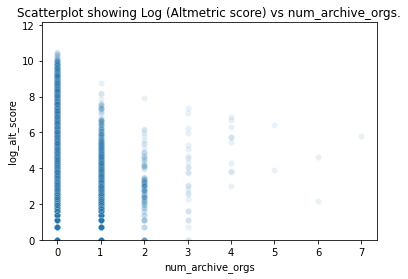

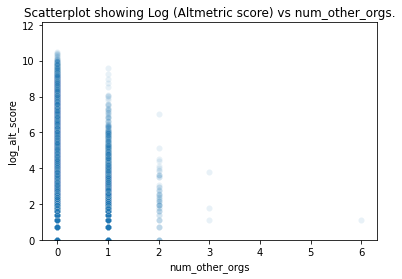

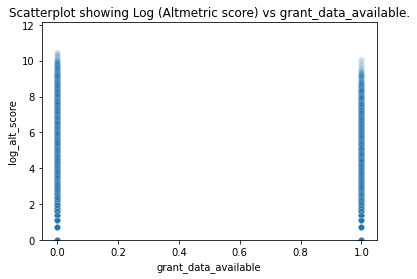

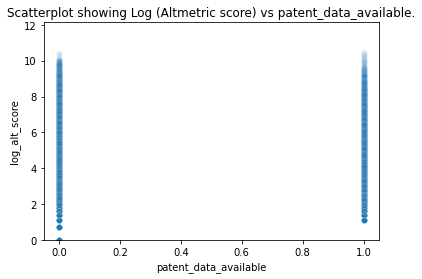

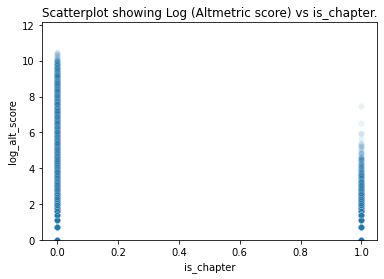

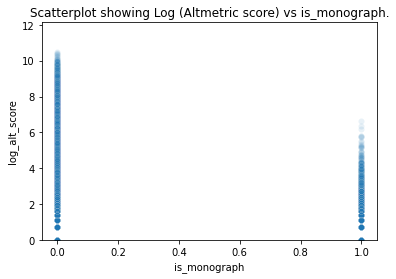

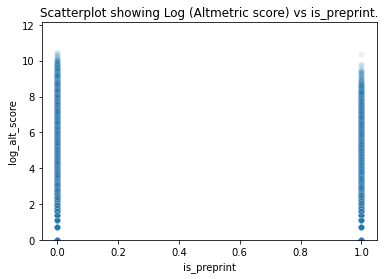

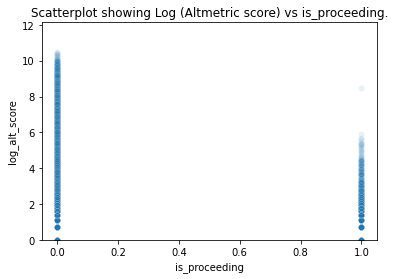

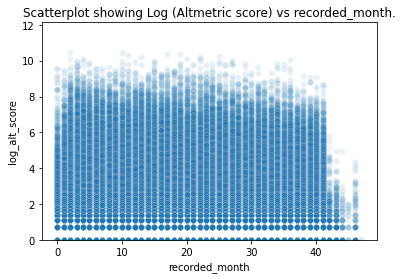

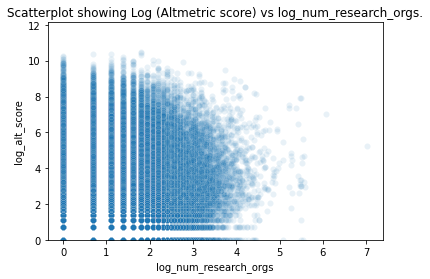

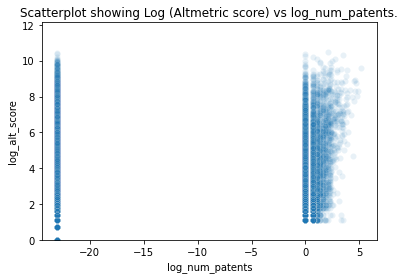

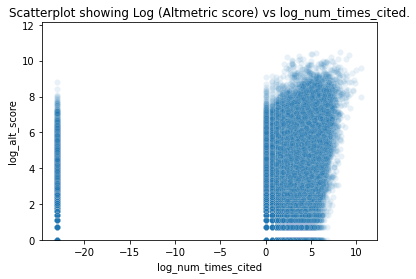

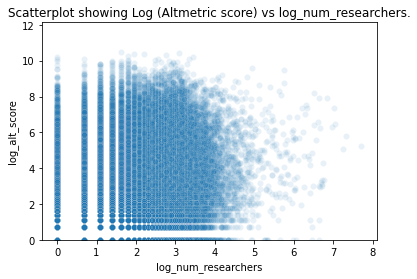

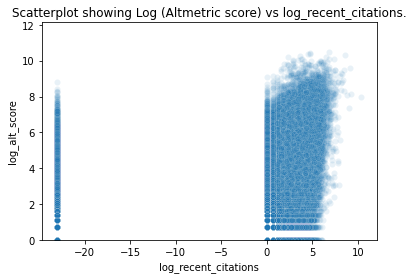

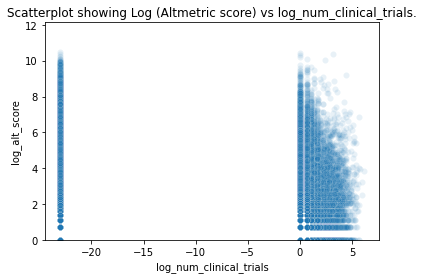

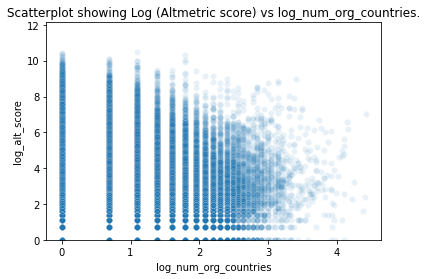

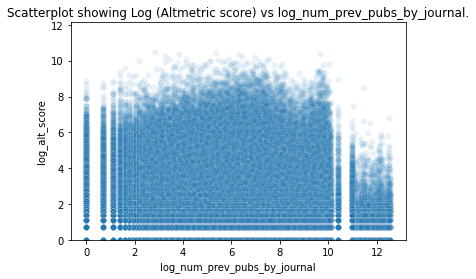

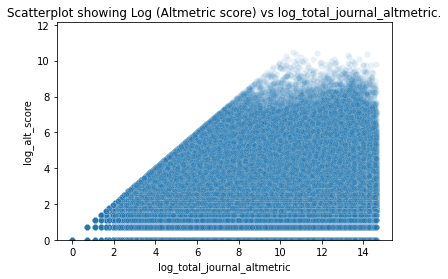

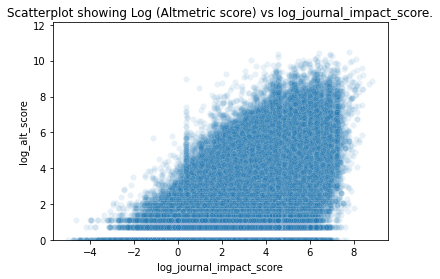

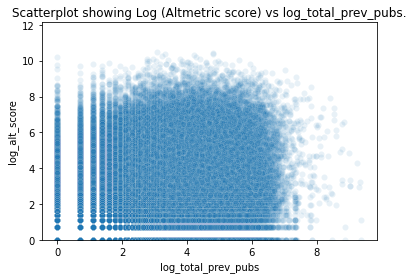

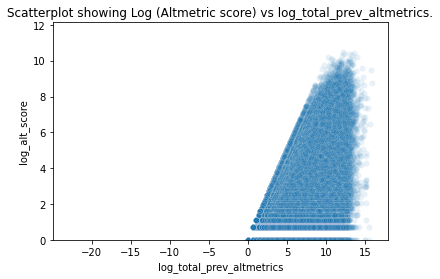

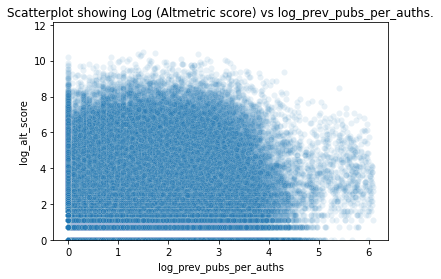

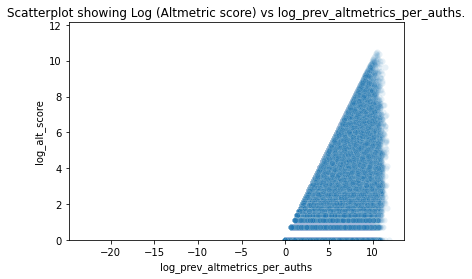

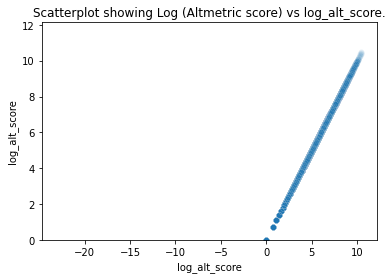

In [24]:
# Visualizing scatter plots of new columns against log(alt_score)

for col in df:
    sns.scatterplot(data=df, x=col, y='log_alt_score', alpha=0.1)
    plt.title(f'Scatterplot showing Log (Altmetric score) vs {col}.')
    plt.ylim(0)
    plt.show()

Text(0.5, 1.0, 'Heatmap showing correlation between variables')

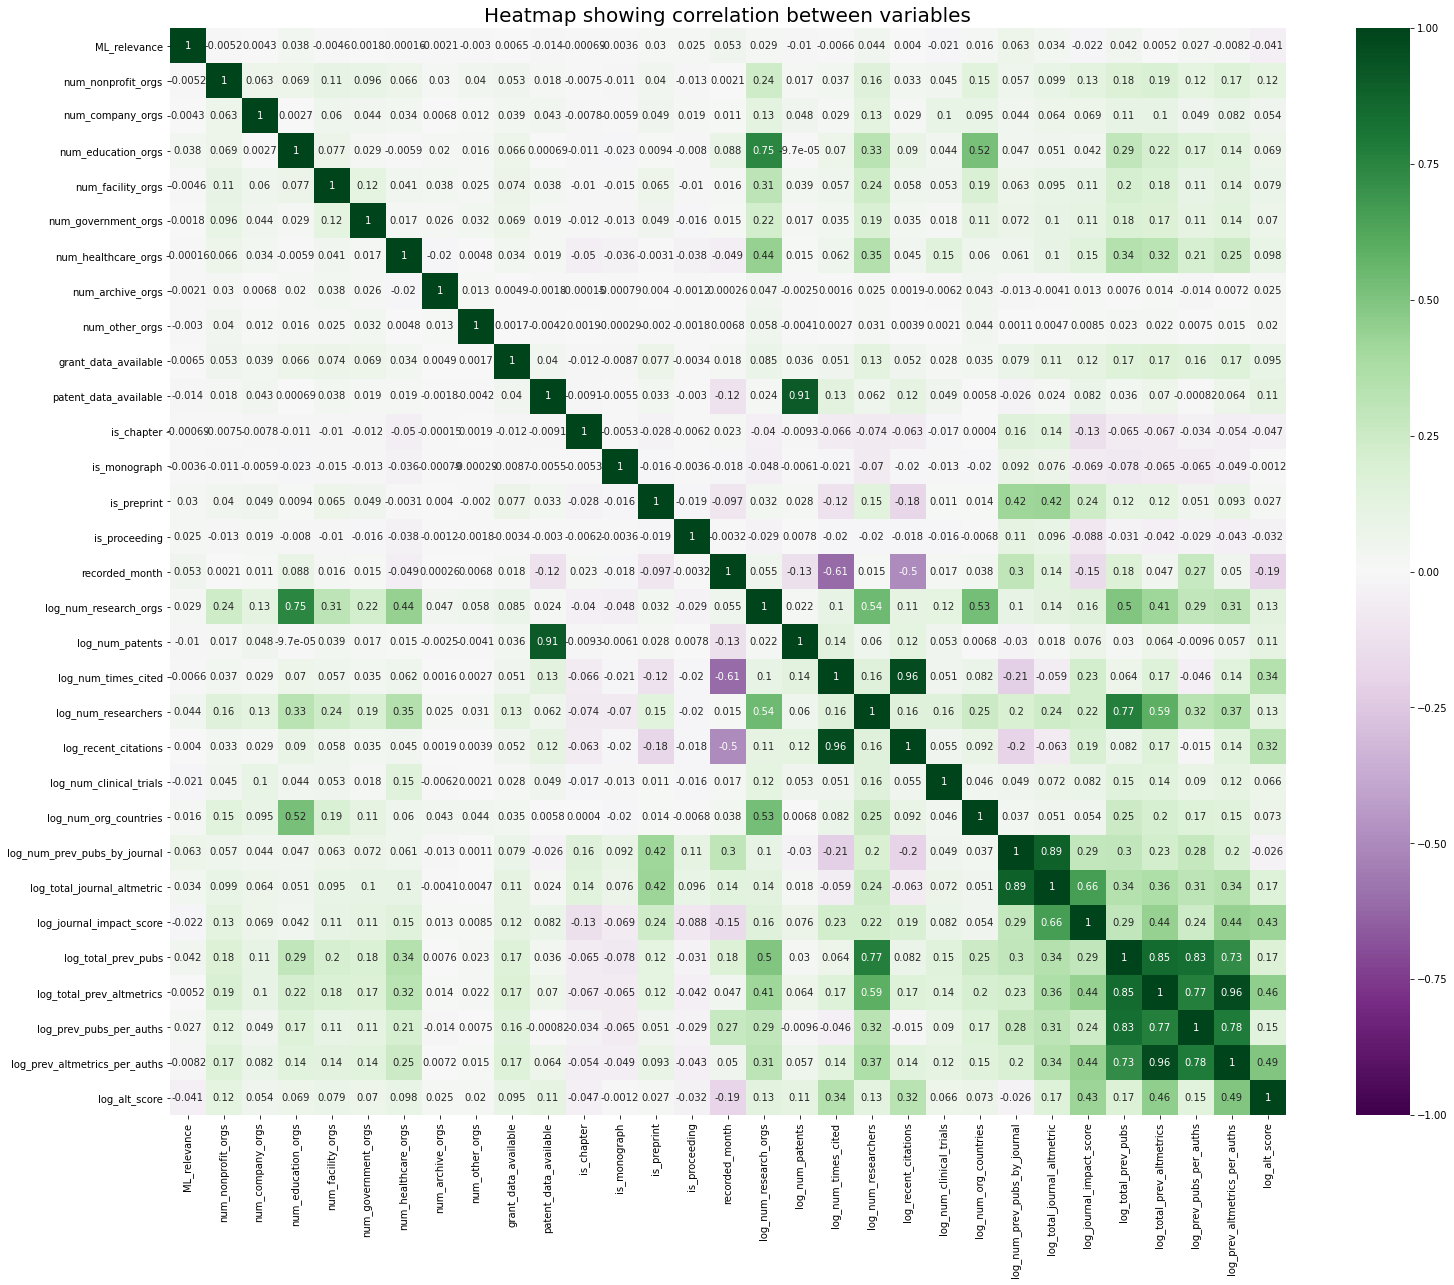

In [25]:
# Plotting a heatmap of the variables to understand correlations between.

corr_map = df.corr(method='spearman')
plt.figure(figsize=(25,20))
hmap = sns.heatmap(corr_map, cmap='PRGn', vmin=-1, vmax=1, annot=True)
hmap.set_title('Heatmap showing correlation between variables', fontsize=20)

Text(0.5, 1.0, 'Heatmap showing correlation between variables')

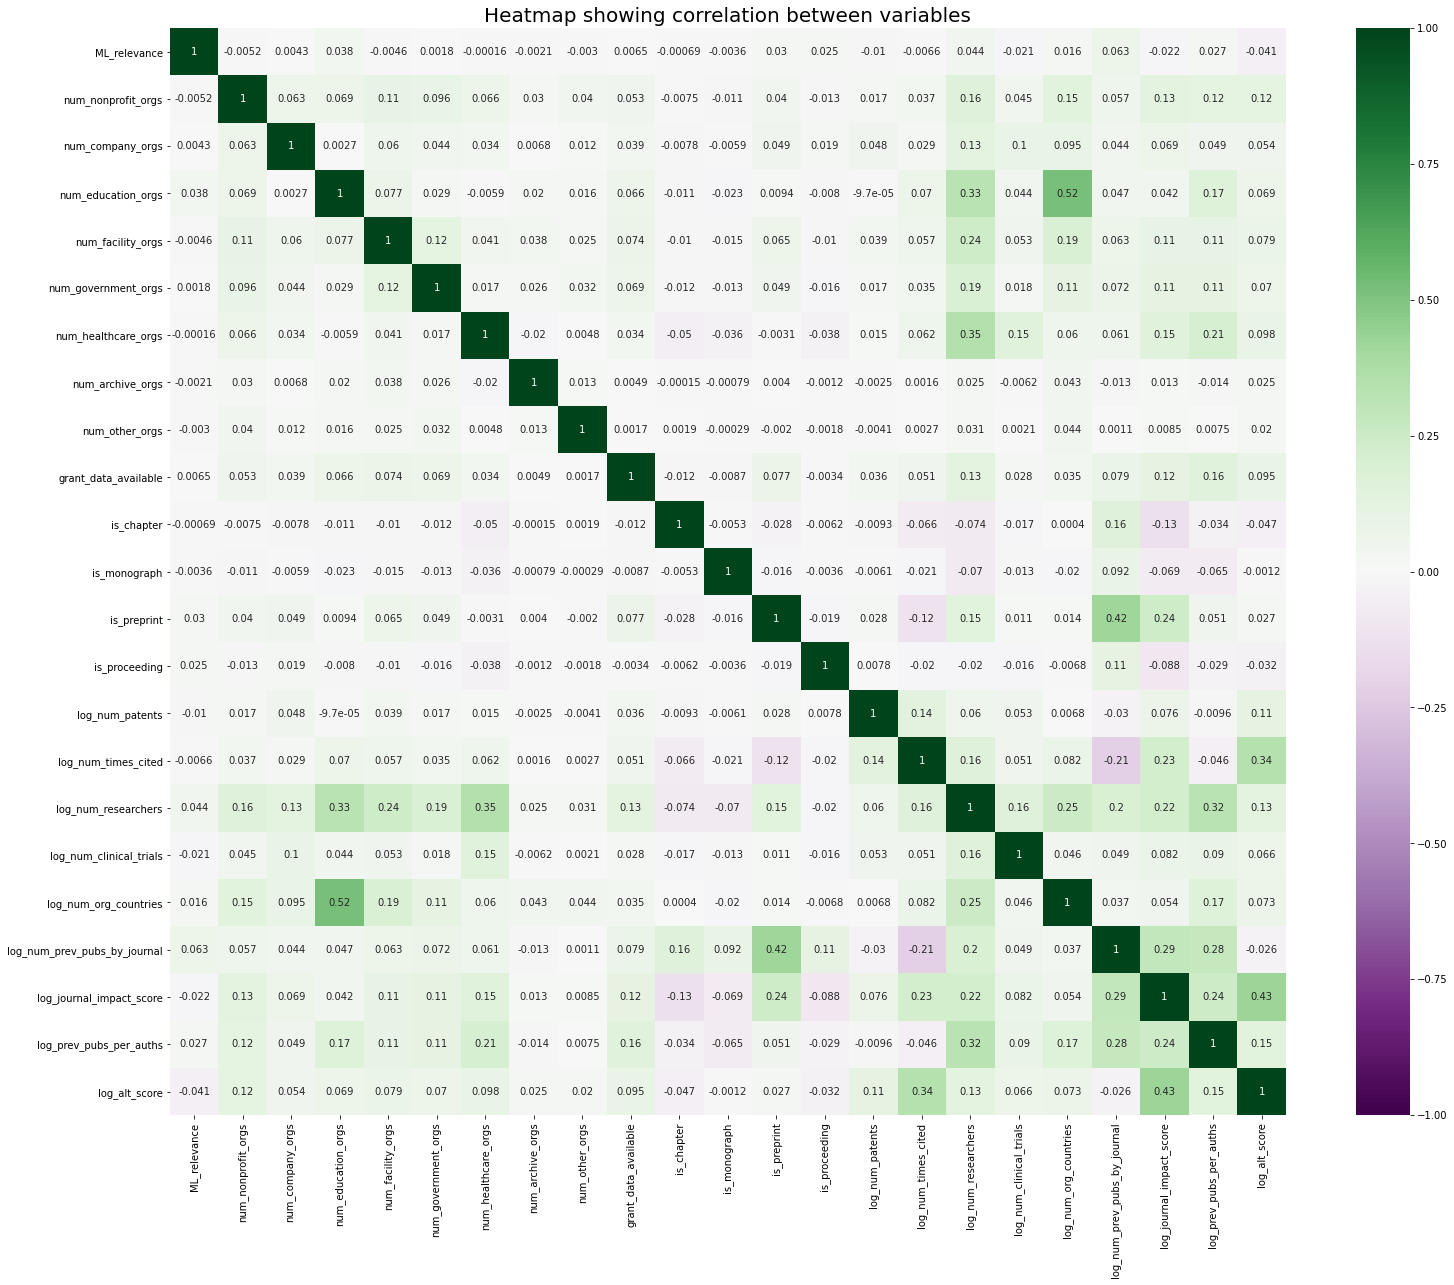

In [26]:
# Removing columns showing possible multicollinearity

cols_to_remove = ['log_num_research_orgs', 'log_total_prev_pubs', 'log_total_prev_altmetrics', 'patent_data_available',
                 'log_recent_citations', 'log_total_journal_altmetric', 'log_prev_altmetrics_per_auths', 'recorded_month']

df = df.drop(columns = cols_to_remove, axis=1)

corr_map = df.corr(method='spearman')
plt.figure(figsize=(25,20))
hmap = sns.heatmap(corr_map, cmap='PRGn', vmin=-1, vmax=1, annot=True)
hmap.set_title('Heatmap showing correlation between variables', fontsize=20)


In [27]:
# Removing columns that show very little correlation


alt_corr = corr_map['log_alt_score']
mask = abs(alt_corr) > 0.1
corr_vars = list(alt_corr[mask].index)
print(f'The list of moderately correlating variable is: {corr_vars}.')

The list of moderately correlating variable is: ['num_nonprofit_orgs', 'log_num_patents', 'log_num_times_cited', 'log_num_researchers', 'log_journal_impact_score', 'log_prev_pubs_per_auths', 'log_alt_score'].


In [28]:
# Eliminating all irrelavent variables.

df = df[corr_vars]
df

num_nonprofit_orgs  log_num_patents  log_num_times_cited  \
0                      0.0       -23.025851             1.098612   
1                      0.0       -23.025851             5.497168   
2                      1.0       -23.025851             2.833213   
3                      0.0       -23.025851             2.302585   
4                      0.0       -23.025851             2.302585   
...                    ...              ...                  ...   
756694                 0.0       -23.025851             1.791759   
756695                 1.0       -23.025851             1.098612   
756696                 1.0       -23.025851             3.931826   
756697                 1.0       -23.025851             1.098612   
756698                 0.0       -23.025851             2.302585   

        log_num_researchers  log_journal_impact_score  \
0                  2.772589                  2.764746   
1                  2.484907                  5.166214   
2                  2.484907                  4.967682   
3                  2.484907                  0.461818   
4                  2.564949                  2.717100   
...                     ...                       ...   
756694             2.484907                  3.388619   
756695             2.564949                  2.795756   
756696             2.302585                  2.664248   
756697             1.791759                  1.878771   
756698             2.944439                  3.117879   

        log_prev_pubs_per_auths  log_alt_score  
0                      2.431418   6.931472e-01  
1                      1.299283   5.690359e+00  
2                      1.406914   4.406719e+00  
3                      1.805553   1.000000e-10  
4                      1.306252   3.713572e+00  
...                         ...            ...  
756694                 0.080043   4.875197e+00  
756695                 0.900787   1.000000e-10  
756696                 1.435085   4.077537e+00  
756697                 1.734601   1.609438e+00  
756698                 2.318251   1.000000e-10  

[621417 rows x 7 columns]

In [29]:
# Removing outliers from the data based on IQR method. Function made with help of chat-GPT.

def remove_outliers_iqr(data, threshold=1.5):
    cleaned_data = data.copy()  # Create a copy of the data to avoid modifying the original

    for column in data.columns:
        # Calculate the first and third quartiles for the column
        q1 = np.percentile(data[column], 25)
        q3 = np.percentile(data[column], 75)

        # Calculate the IQR for the column
        iqr = q3 - q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Identify outliers for the column
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

        # Remove outliers from the column
        cleaned_data.loc[outliers, column] = np.nan

    return cleaned_data

# Passing function, removing more extreme outliers (IQR x 3)

trim_data = remove_outliers_iqr(df,3)
trim_data

num_nonprofit_orgs  log_num_patents  log_num_times_cited  \
0                      0.0       -23.025851             1.098612   
1                      0.0       -23.025851             5.497168   
2                      NaN       -23.025851             2.833213   
3                      0.0       -23.025851             2.302585   
4                      0.0       -23.025851             2.302585   
...                    ...              ...                  ...   
756694                 0.0       -23.025851             1.791759   
756695                 NaN       -23.025851             1.098612   
756696                 NaN       -23.025851             3.931826   
756697                 NaN       -23.025851             1.098612   
756698                 0.0       -23.025851             2.302585   

        log_num_researchers  log_journal_impact_score  \
0                  2.772589                  2.764746   
1                  2.484907                  5.166214   
2                  2.484907                  4.967682   
3                  2.484907                  0.461818   
4                  2.564949                  2.717100   
...                     ...                       ...   
756694             2.484907                  3.388619   
756695             2.564949                  2.795756   
756696             2.302585                  2.664248   
756697             1.791759                  1.878771   
756698             2.944439                  3.117879   

        log_prev_pubs_per_auths  log_alt_score  
0                      2.431418   6.931472e-01  
1                      1.299283   5.690359e+00  
2                      1.406914   4.406719e+00  
3                      1.805553   1.000000e-10  
4                      1.306252   3.713572e+00  
...                         ...            ...  
756694                 0.080043   4.875197e+00  
756695                 0.900787   1.000000e-10  
756696                 1.435085   4.077537e+00  
756697                 1.734601   1.609438e+00  
756698                 2.318251   1.000000e-10  

[621417 rows x 7 columns]

In [30]:
# Verifying the proportion of null values created from the outlier-removal function.

trim_data.isna().sum()/len(trim_data)*100

num_nonprofit_orgs          7.359792
log_num_patents             1.216253
log_num_times_cited         0.000000
log_num_researchers         0.012552
log_journal_impact_score    0.004023
log_prev_pubs_per_auths     0.019954
log_alt_score               0.003379
dtype: float64

<AxesSubplot:>

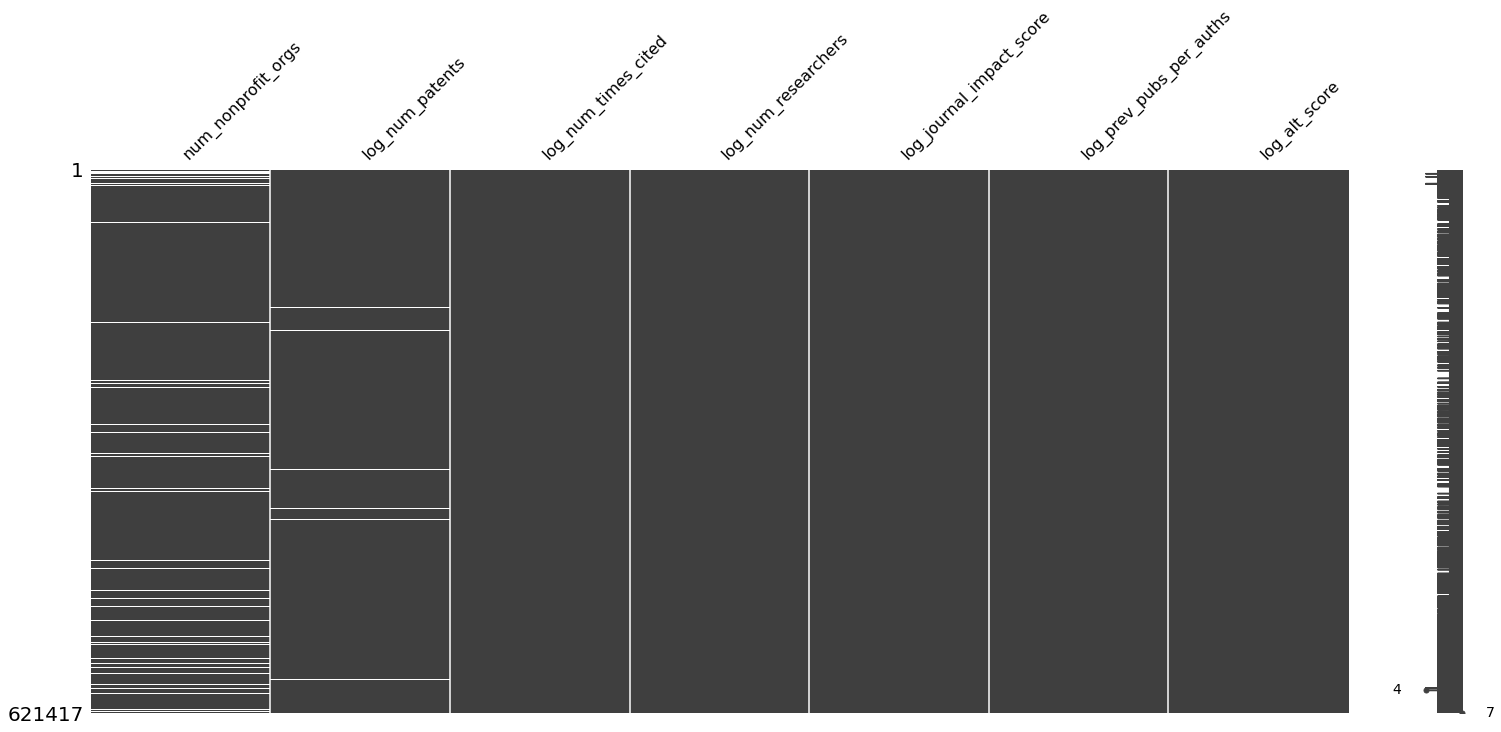

In [31]:
# Visualising the null values

msno.matrix(trim_data)

<AxesSubplot:>

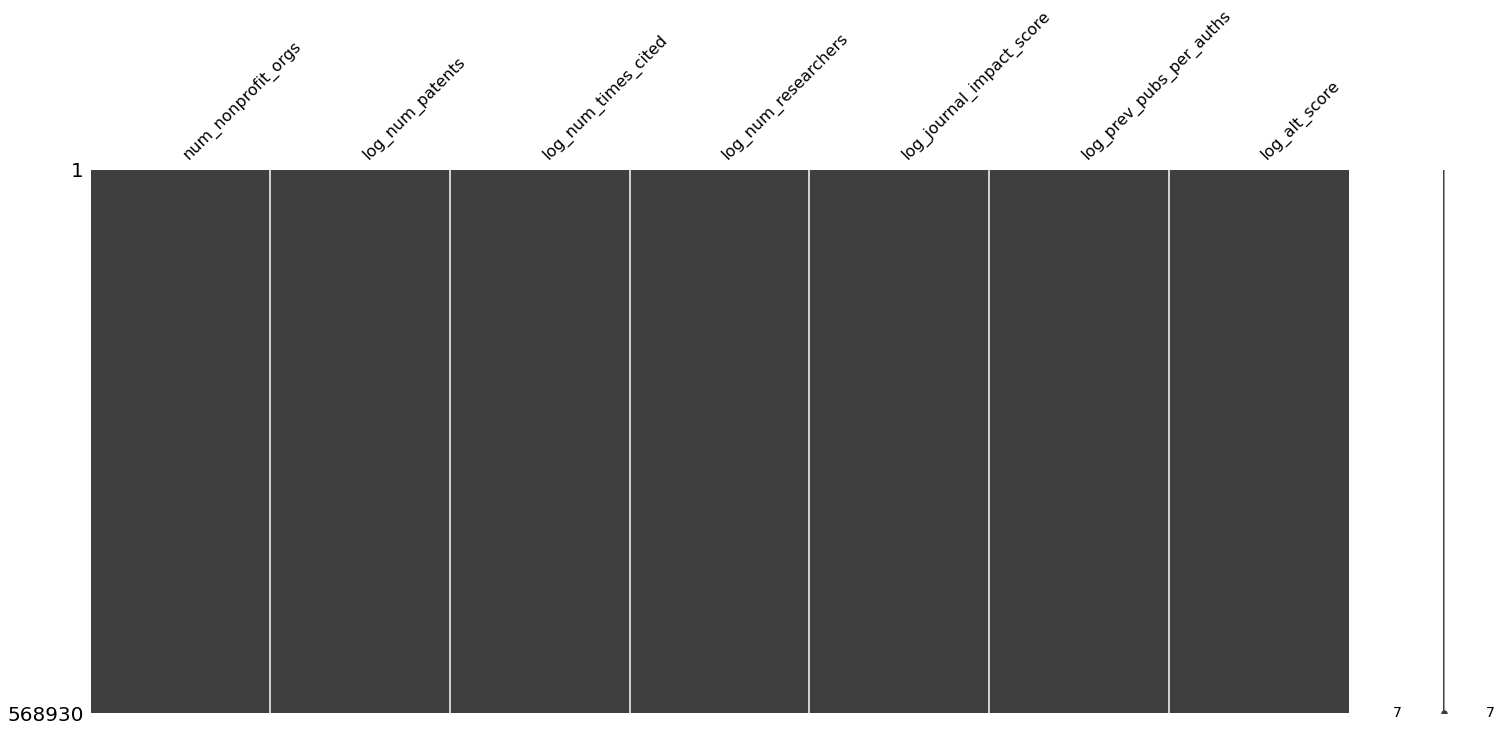

In [32]:
# Dropping the null values

trimmed_data = trim_data.dropna()
msno.matrix(trimmed_data)


In [33]:
# Reviewing the data with outliers removed

trimmed_data.describe()

num_nonprofit_orgs  log_num_patents  log_num_times_cited  \
count            568930.0     5.689300e+05        568930.000000   
mean                  0.0    -2.302585e+01            -4.979830   
std                   0.0     2.486902e-14            11.075864   
min                   0.0    -2.302585e+01           -23.025851   
25%                   0.0    -2.302585e+01           -23.025851   
50%                   0.0    -2.302585e+01             1.098612   
75%                   0.0    -2.302585e+01             2.197225   
max                   0.0    -2.302585e+01             9.215328   

       log_num_researchers  log_journal_impact_score  log_prev_pubs_per_auths  \
count         5.689300e+05             568930.000000             5.689300e+05   
mean          1.404492e+00                  2.568149             9.829455e-01   
std           8.003681e-01                  1.477894             8.758834e-01   
min           1.000000e-10                 -4.182050             1.000000e-10   
25%           6.931472e-01                  1.609438             2.231436e-01   
50%           1.386294e+00                  2.553226             8.266786e-01   
75%           1.945910e+00                  3.522845             1.540445e+00   
max           5.697093e+00                  8.715224             5.556828e+00   

       log_alt_score  
count   5.689300e+05  
mean    1.518126e+00  
std     1.543102e+00  
min     1.000000e-10  
25%     1.000000e-10  
50%     1.098612e+00  
75%     2.397895e+00  
max     9.926911e+00

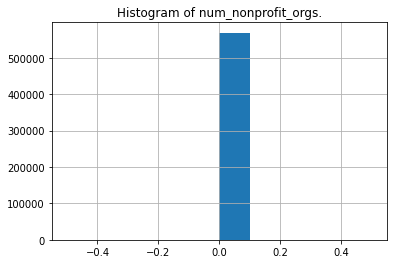

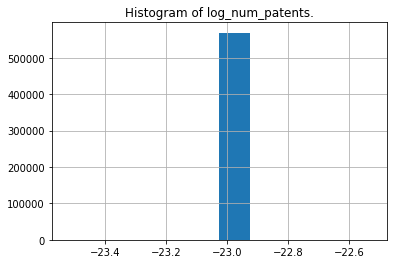

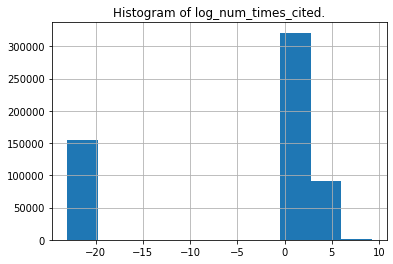

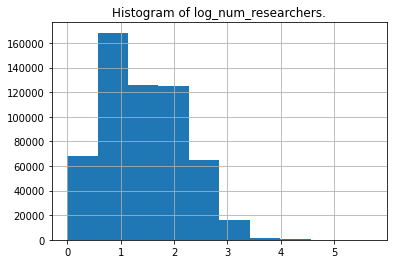

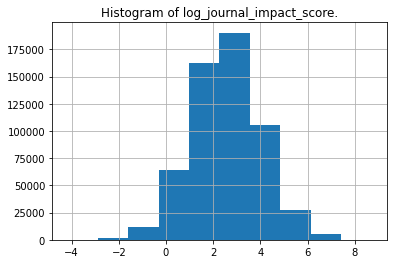

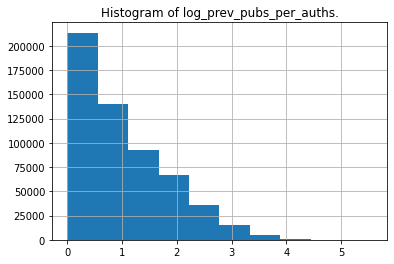

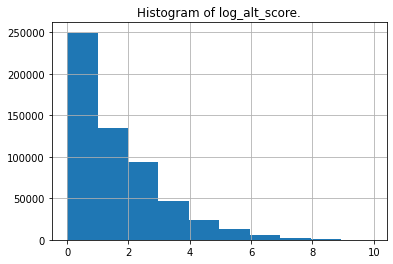

In [34]:
# Checking the new distributions of each variable. 

for col in trimmed_data:
    trimmed_data[col].hist()
    plt.title(f'Histogram of {col}.')
    plt.show()

Text(0.5, 1.0, 'Heatmap showing correlation between variables')

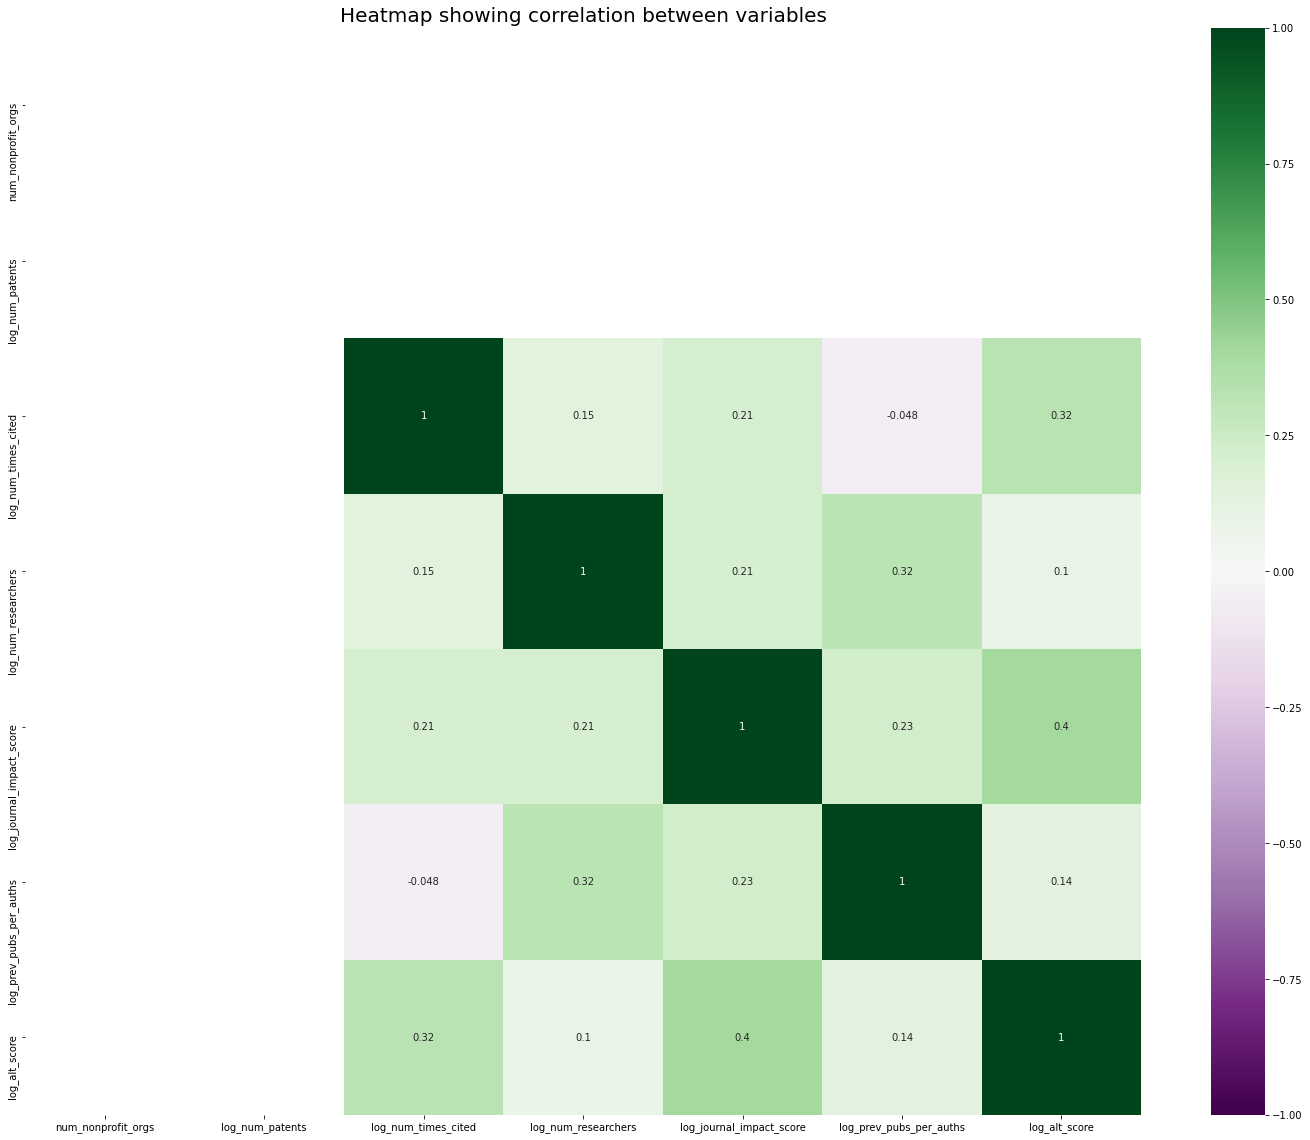

In [35]:
# Understanding the correlation between the newly created variables.

corr_map = trimmed_data.corr(method='spearman')
plt.figure(figsize=(25,20))
hmap = sns.heatmap(corr_map, cmap='PRGn', vmin=-1, vmax=1, annot=True)
hmap.set_title('Heatmap showing correlation between variables', fontsize=20)

In [36]:
# Renaming the dataframe for clarity

df = trimmed_data

# Standardization

In [37]:
# Assigning the target variable and the predictor variables.
# Y is transformed into an array to match the 2-dimensional X variables.

Y = np.array(df['log_alt_score'])

X = df.drop(columns=['log_alt_score'], axis=1)


In [38]:
# Ensuring the shape of X and Y are similar

display(X.shape)

Y = Y.reshape(-1,1)
Y.shape

(568930, 6)

(568930, 1)

In [39]:
# Standardizing the predictor variables due to varied scales among the variables.

scaler = StandardScaler()
std_X = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame (in order to keep the variable names.)

std_X = pd.DataFrame(std_X, columns=X.columns)

In [40]:
# Verifying the standardization worked well

std_X.head()

num_nonprofit_orgs  log_num_patents  log_num_times_cited  \
0                 0.0    -2.486900e-14             0.548801   
1                 0.0    -2.486900e-14             0.945931   
2                 0.0    -2.486900e-14             0.657504   
3                 0.0    -2.486900e-14             0.657504   
4                 0.0    -2.486900e-14             0.449611   

   log_num_researchers  log_journal_impact_score  log_prev_pubs_per_auths  
0             1.709336                  0.133025                 1.653729  
1             1.349899                  1.757952                 0.361164  
2             1.349899                 -1.425227                 0.939175  
3             1.449906                  0.100786                 0.369120  
4             1.988138                  1.423140                 1.523638

# Feature Selection

In [41]:
# Selecting the best features using RFE. Looping through to find the optimal number of features.

num_features = []
r_sqrd_score = []
list_of_features = []

for i in range(1,len(std_X.columns)):

    #Creating the RFE object and iterating through progressively larger numbers of columns to find optimal size
    estimator = LinearRegression()
    rfe = RFE(estimator=estimator, n_features_to_select=i)
    rfe.fit(std_X, Y)
    
    # Using the 'best' features only to create the model
    selected_features = std_X.columns[rfe.support_]
    X_selected = rfe.transform(std_X)

    # Creating the model and appending the scores/features to the lists above
    sm_model = sm.OLS(Y, sm.add_constant(X_selected)).fit()
    num_features.append(i)
    r_sqrd_score.append(sm_model.rsquared)
    list_of_features.append(selected_features)
    
    
print(num_features)
print(r_sqrd_score)


[1, 2, 3, 4, 5]
[0.20340648825220198, 0.23412621507309495, 0.2378319980662923, 0.2378323270426076, 0.23783232704260682]


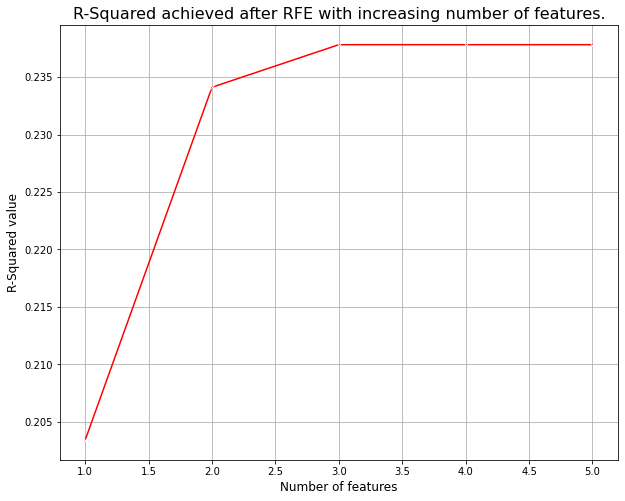

In [42]:
# Plotting the results of RFE

plt.figure(figsize=(10,8))
sns.lineplot(x=num_features, y=r_sqrd_score, marker='x', color='red')
plt.title('R-Squared achieved after RFE with increasing number of features.', fontsize=16)
plt.xlabel('Number of features', fontsize=12)
plt.ylabel('R-Squared value', fontsize=12)
plt.grid()

In [43]:
# Creating the model with 3 best features as improvements were minor after 3 features.

estimator = LinearRegression()
rfe = RFE(estimator=estimator, n_features_to_select=3)
rfe.fit(std_X, Y)
    
# Using the 'best' features only to create the model
selected_features = std_X.columns[rfe.support_]
X_selected = rfe.transform(std_X)

# Ensuring the variable names are kept.
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)


sm_model = sm.OLS(Y, sm.add_constant(X_selected_df)).fit()

print(sm_model.summary())
print(selected_features)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                 5.918e+04
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:42:57   Log-Likelihood:            -9.7682e+05
No. Observations:              568930   AIC:                         1.954e+06
Df Residuals:                  568926   BIC:                         1.954e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [44]:
# Ensuring only significant variables are kept within the model
# (Redundant in this case, however was needed throughout model creation)

sig_cols = pd.Series(sm_model.pvalues[sm_model.pvalues < 0.05], index=selected_features).dropna().index

sig_X=df[sig_cols]

sm_model = sm.OLS(Y, sm.add_constant(sig_X)).fit()

print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                 5.918e+04
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:42:57   Log-Likelihood:            -9.7682e+05
No. Observations:              568930   AIC:                         1.954e+06
Df Residuals:                  568926   BIC:                         1.954e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [45]:
# Splitting the data into training and test sets. Creating a model in sklearn.

X_train, X_test, Y_train, Y_test = train_test_split(sig_X, Y, test_size=0.2, random_state=5)

Lin_model = LinearRegression()
Lin_model.fit(X_train, Y_train)

# Using the model to predict the altmetric score.

Y_hat = Lin_model.predict(X_train)

print(f'R-Squared of the model on the training set is: {round(Lin_model.score(X_train, Y_train), 2)}.')
print(f'R-Squared of the model on the testing set is: {round(Lin_model.score(X_test, Y_test), 2)}.')

R-Squared of the model on the training set is: 0.24.
R-Squared of the model on the testing set is: 0.24.


Text(0.5, 1.0, 'Scatterplot showing residuals vs predicted values')

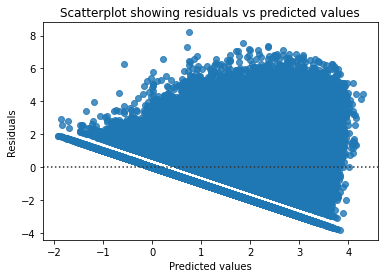

In [53]:
# Plotting the residuals of the predictions

residuals = Y_train - Y_hat

sns.residplot(Y_hat, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Scatterplot showing residuals vs predicted values')

Text(0.5, 6.79999999999999, 'Residuals')

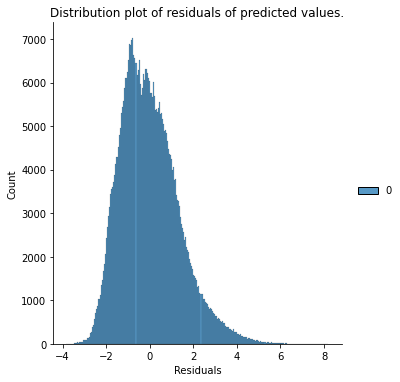

In [54]:
# Residual plot shows a fairly normal distribution, though slightly skewed to the right.

sns.displot(residuals)
plt.title('Distribution plot of residuals of predicted values.')
plt.xlabel('Residuals')

In [48]:
# Reviewing the coefficients

coefs = sm_model.params.sort_values(ascending=False)
coefs

const                       0.441634
log_journal_impact_score    0.426118
log_prev_pubs_per_auths     0.110698
log_num_times_cited         0.025433
dtype: float64

In [49]:
# Finding the exponent of the log transformed variables for easier interpretation.

final_coefs = np.exp(coefs)
final_coefs.index = final_coefs.index.str.replace('log_', '')
final_coefs

const                   1.555247
journal_impact_score    1.531301
prev_pubs_per_auths     1.117057
num_times_cited         1.025759
dtype: float64